# **프로젝트 루브릭**

```markdown

학습목표

1. 기존 KoGPT2와 SFT 적용 모델 결과 분석했는가?.

     -기존 모델의 결과물과 SFT를 적용한 모델의 결과물을 정량/정성적으로 비교/분석했다.

2. SFT 모델과 RM 모델 결과 분석을 해보았는가?

     - SFT를 적용한 모델의 결과물과 RM을 적용한 모델의 결과물을 정량/정성적으로 비교/분석했다

3. 데이터셋 정제 / 새로운 데이터셋 / foundation model 교체 중 하나를 이용해 정량적 성능 향상을 해보았는가?

   1. 기존 데이터셋을 추가로 정제하고, generation 성능을 올리기 위한 기법(Beam search, Top-k sampling 등)을 실험해 모델 성능을 향상시켰다.
   2. 새로운 데이터를 수집해 전처리를 수행하여 모델의 성능을 향상시켰다.
   3. 더 적절한 학습 전략(SFT, RM, PPO)을 적용하거나 initial model을 변경해 모델의 성능을 향상시켰다.

# **데이터셋 설명**

```markdown

chatgpt의 RLHF를 학습하기 위한 4가지 step의 한국어 데이터셋

다양한 한국어 질문을 포함하는 데이터셋에서 질문을 수집하였으며, 여기에는 ChatbotData, AI허브의 한국어 대화 및 일반상식 데이터, KorQuad 등이 포함되어있습니다. 이 중 12,000개의 질문을 랜덤으로 추출하였습니다.

수집된 질문에 대한 답변을 생성하기 위해 ChatGPT를 활용하였으며 각 질문을 ChatGPT에 입력하여 자동으로 답변을 생성하였습니다.

사람이 직접 레이블링하는 대신 ChatGPT를 활용하여 대량의 질문-답변 데이터를 효율적으로 생성하였으며, 이를 통해 모델의 성능을 향상시키고자 하였습니다.

1.1) 한국어 질문 데이터셋에서 질문 수집
        
        출처
        data1, ChatbotData/11824문장
        data2, AI허브_한국어 대화/49711문장
        data3, AI허브_일반상식/100268
        data4, KorQuad/5774
        4가지 데이터셋에서 총 167,577 질문셋 수집, 12,000개 질문 랜덤 추출

RLHF 데이터셋 생성
1.2) step1, SFT(Supervised Fine-tuning) 데이터셋 구축

1.3) step2, RM(Reward Model, 좋은글 채점모델) 데이터셋 구축

1.4) step3, PPO(질문에 ``더`` 잘 답하는 모델) 데이터셋 구축

# **전반적 프로젝트 소회 및 느낀 점**

# **프로젝트 결과 요약**

# **프로젝트 코드**

In [ ]:
#관리자로 설치해야지 된다. 폰트 문제 해결을 배웠다. 코랩에서는 항상 문제가 발생한다. 좀 문제 좀 해결해줘라.
!sudo apt update
!sudo apt install fonts-nanum

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://cli.github.com/packages stable InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
65 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as re

In [ ]:
# 코랩에서 한글폰트 설치는 언제나 애를 먹인다. 언제까지 이럴꺼니...!

# 1단계: 폰트 캐시 완전 삭제
!rm -rf ~/.cache/matplotlib
!rm -rf ~/.fontconfig
print("✓ 폰트 캐시 삭제 완료")


# 3단계: 폰트 설정 재구성
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# matplotlib 폰트 캐시 강제 초기화는 필요 없음 (런타임 재시작으로 충분)
# fm._rebuild() # 이 라인을 제거 또는 주석 처리하여 오류를 해결합니다.

# 4단계: 사용 가능한 폰트 확인
available_fonts = [f.name for f in fm.fontManager.ttflist]
nanum_check = [f for f in available_fonts if 'nanum' in f.lower()]
print(f"\n나눔 폰트 확인: {nanum_check}")

# 5단계: 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
print(f"\n현재 설정 폰트: {plt.rcParams['font.family']}")

✓ 폰트 캐시 삭제 완료

나눔 폰트 확인: ['NanumMyeongjo', 'NanumMyeongjo', 'NanumBarunGothic', 'NanumGothic', 'NanumSquare', 'NanumSquareRound', 'NanumGothicCoding', 'NanumBarunGothic', 'NanumGothicCoding', 'NanumSquareRound', 'NanumSquare', 'NanumGothic']

현재 설정 폰트: ['NanumGothic']


설치된 나눔 폰트: ['NanumMyeongjo', 'NanumMyeongjo', 'NanumBarunGothic', 'NanumGothic', 'NanumSquare', 'NanumSquareRound', 'NanumGothicCoding', 'NanumBarunGothic', 'NanumGothicCoding', 'NanumSquareRound', 'NanumSquare', 'NanumGothic']


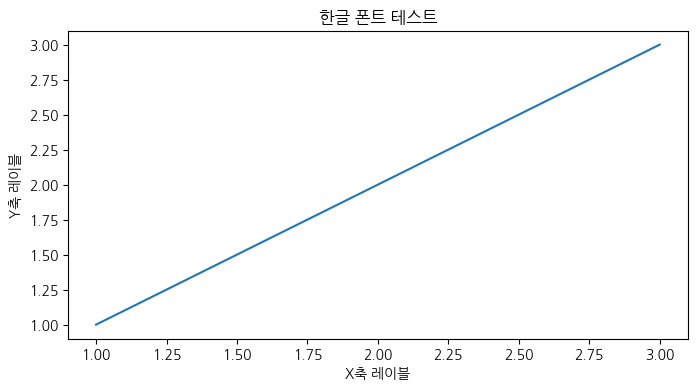

In [ ]:
#한글 폰트 설치 성공 확인
import matplotlib.font_manager as fm # 이 줄을 추가하여 fm을 정의합니다.

# 폰트 캐시 강제 재로드
fm._load_fontmanager(try_read_cache=False)

# 설치된 나눔 폰트 확인
nanum_fonts = [f.name for f in fm.fontManager.ttflist if 'nanum' in f.name.lower()]
print("설치된 나눔 폰트:", nanum_fonts)

# matplotlib 설정
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 테스트 플롯
plt.figure(figsize=(8, 4))
plt.plot([1, 2, 3], [1, 2, 3])
plt.title('한글 폰트 테스트')
plt.xlabel('X축 레이블')
plt.ylabel('Y축 레이블')
plt.show()

In [1]:
#가져오기
!git clone https://github.com/airobotlab/KoChatGPT
!cp -r /content/KoChatGPT/colossalai_ChatGPT_230319/chatgpt /content/chatgpt

Cloning into 'KoChatGPT'...
remote: Enumerating objects: 304, done.
remote: Total 304 (delta 0), reused 0 (delta 0), pack-reused 304 (from 1)
Receiving objects: 100% (304/304), 57.72 MiB | 15.59 MiB/s, done.
Resolving deltas: 100% (123/123), done.


In [2]:
!pip install datasets
!pip install loralib
!pip install trl
!pip install accelerate
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.5/465.5 kB 10.9 MB/s eta 0:00:00


현재 코랩 버전에서는 일부 라이브러리를 사용하는데 장애가 있어 원본 소스 코드의 일부를 수정한 뒤 진행하겠습니다. 다음 코드를 위 clone 이후 동작시켜야합니다.

In [3]:
import os

modifications = [
    {
        "file": "/content/chatgpt/trainer/callbacks/save_checkpoint.py",
        "changes": [
            {"line": 3, "old": "from chatgpt.trainer.strategies import ColossalAIStrategy, Strategy",
             "new": "from chatgpt.trainer.strategies import Strategy"},
            {"line": 71, "old": "only_rank0 = not isinstance(self.strategy, ColossalAIStrategy)",
             "new": "            only_rank0 = not isinstance(self.strategy)"},
        ],
    },
    {
        "file": "/content/chatgpt/trainer/strategies/__init__.py",
        "changes": [
            {"line": 1, "old": "from .colossalai import ColossalAIStrategy", "new": ""},  # 삭제
            {"line": 5, "old": "__all__ = ['Strategy', 'NaiveStrategy', 'DDPStrategy', 'ColossalAIStrategy']",
             "new": "__all__ = ['Strategy', 'NaiveStrategy', 'DDPStrategy']"},
        ],
    },
    {
        "file": "/content/chatgpt/dataset/reward_dataset.py",
        "changes": [
            {"line": 3, "old": "from tqdm import tqdm", "new": "from tqdm.notebook import tqdm"},
        ],
    },
    {
        "file": "/content/chatgpt/trainer/base.py",
        "changes": [
            {"line": 8, "old": "from tqdm import tqdm", "new": "from tqdm.notebook import tqdm"},
        ]
    },
    {
        "file": "/content/chatgpt/trainer/rm.py",
        "changes": [
            {"line": 8, "old": "from tqdm import tqdm", "new": "from tqdm.notebook import tqdm"},
        ]
    }
]


def modify_file(file_path, changes):
    """파일에서 지정된 줄을 찾아 내용을 수정하는 함수"""

    if not os.path.exists(file_path):
        print(f"⚠️ 파일이 존재하지 않습니다: {file_path}")
        return

    with open(file_path, "r", encoding="utf-8") as file:
        lines = file.readlines()

    modified = False

    for change in changes:
        line_index = change["line"]
        if 0 <= line_index < len(lines):
            if lines[line_index].strip() == change["old"]:
                lines[line_index] = change["new"] + "\n"
                modified = True
            else:
                print(f"⚠️ {file_path} 파일의 {change['line']}번째 줄이 예상과 다릅니다.")
                print(f"   예상: {change['old']}")
                print(f"   실제: {lines[line_index].strip()}")

    if modified:
        with open(file_path, "w", encoding="utf-8") as file:
            file.writelines(lines)
        print(f"✅ 수정 완료: {file_path}")
    else:
        print(f"⚠️ {file_path} 수정할 내용이 없습니다.")

for mod in modifications:
    modify_file(mod["file"], mod["changes"])

✅ 수정 완료: /content/chatgpt/trainer/callbacks/save_checkpoint.py
✅ 수정 완료: /content/chatgpt/trainer/strategies/__init__.py
✅ 수정 완료: /content/chatgpt/dataset/reward_dataset.py
✅ 수정 완료: /content/chatgpt/trainer/base.py
✅ 수정 완료: /content/chatgpt/trainer/rm.py


In [4]:
import torch
import transformers
from transformers import AutoTokenizer, AutoModelForCausalLM
import pandas as pd
import numpy

print("Torch version:{}".format(torch.__version__)) # Torch version:1.12.1
print("Cuda version: {}".format(torch.version.cuda)) # Cuda version: 11.3
print("transformers version: {}".format(transformers.__version__)) # transformers 4.28.0
print("GPU 사용 가능여부: {}".format(torch.cuda.is_available()))

# 만일 아래 모듈이 불러와지지 않는다면 Clone 및 수정을 잘 진행했는지 확인해주세요.
# 아래 모듈 불러져왔는지 확인 후 출력 추
from chatgpt.trainer.strategies import NaiveStrategy

print(NaiveStrategy)
print("✅ 모듈 import 성공!")

Torch version:2.9.0+cu126
Cuda version: 12.6
transformers version: 4.57.2
GPU 사용 가능여부: True
<class 'chatgpt.trainer.strategies.naive.NaiveStrategy'>
✅ 모듈 import 성공!


In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model_name = "skt/kogpt2-base-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/513M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/513M [00:00<?, ?B/s]

아래 코드 블럭들은 모델에 대한 기본적인 성능 점검 (디버깅 이슈가 없으면 향후 패스)

In [ ]:
tokenizer.model_max_length

1000000000000000019884624838656

In [ ]:
model.config.n_positions

1024

In [ ]:
input_txt = "바람도 없는 공중에 수직의 파문을 내이며 고요히 떨어지는 오동잎은 누구의 발자취 입니까."

In [ ]:
tokens = tokenizer(input_txt).tokens()
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].numpy()

In [ ]:
pd.options.display.max_columns = 40
pd.options.display.max_rows = 60
df = pd.DataFrame([tokens, input_ids[0]], index=["kogpt-2_tokens", "Input_IDs"])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
kogpt-2_tokens,▁바람,도,▁없는,▁공중에,▁수직,의,▁파,문을,▁내,이며,▁고,요,히,▁떨어지는,▁오동,잎은,▁누,구의,▁발자,취,▁입,니까,.
Input_IDs,10891,7235,9712,49207,14438,8143,9203,9941,9094,9639,9065,8084,8811,21215,34769,19985,9669,10139,21626,8408,9241,23775,389


In [ ]:
max_length=128
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device)
output_greedy = model.generate(input_ids, max_length=max_length, do_sample=False)
print(tokenizer.decode(output_greedy[0]))

바람도 없는 공중에 수직의 파문을 내이며 고요히 떨어지는 오동잎은 누구의 발자취 입니까.'
"그렇다면 그건 무슨 소리요?"
"그건 무슨 소리요?"
"그건 무슨 소리요?"
"그건 무슨 소리요?"
"그건 무슨 소리요?"
"그건 무슨 소리요?"
"그건 무슨 소리요?"
"그건 무슨 소리요?"
"그건 무슨 소리요?"
"그건 무슨 소리요?"
"그건 무슨 소리요?"
"그건 무슨 소리요?"
"그건 무슨 소리


분석 결과: 처음 디코딩시 greedy 방식만으로 반복되는 답변의 맥락도 전혀 상관 없거나 혹은 이해하지 못한 상태에서....  그 단어를 반복적으로 배출하였다.

In [ ]:
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device)
output_beam = model.generate(input_ids, max_length=max_length, num_beams=10, no_repeat_ngram_size=2,
                             do_sample=False)
print(tokenizer.decode(output_beam[0]))

바람도 없는 공중에 수직의 파문을 내이며 고요히 떨어지는 오동잎은 누구의 발자취 입니까.'
"그렇지 않습니다."
"어떻게 된 일입니까?"
그녀는 고개를 갸웃거렸다.
"아니, 그게 무슨 말씀이신지 모르겠습니다만."
"무슨 말씀인지 알 수가 없군요."
아무런 대답도 하지 않은 채 그녀는 고개를 끄덕였다.
"그래, 알았어."
그녀의 눈에서 눈물이 주르륵 흘러내렸다.
그녀가 다시 입을 열었다.
"정말 죄송합니다, 고마워요, 고맙습니다"
"


분석 결과: n-gram size=2 추가 시, 질문에는 전혀 상관 없는 답변이지만 답변 내에서는 약간의 맥락이 흐름지만 여전히 반복된 답변을 구사함을 알 수 있다.

In [ ]:
output_beam = model.generate(input_ids, max_length=max_length, num_beams=7, no_repeat_ngram_size=2,
                             do_sample=True, temperature=2.0, top_k=50)
print(tokenizer.decode(output_beam[0]))

바람도 없는 공중에 수직의 파문을 내이며 고요히 떨어지는 오동잎은 누구의 발자취 입니까. 아, 이게 저기 있는 거야. 네, 네 이거야? 네가 이걸 보고 있을 리 있겠어요."
"저기 있네요. 어때요?"
나는 고개를 끄덕였다.
나는 창백한 얼굴에 고개를 푹 숙였다.
"아! 그건 그렇고! 어째서 그러세요, 아줌마."
아줌마가 나를 돌아보았다.
"그럼 왜 안 오시는 거예요!"
아내가 나를 쳐다보며 말했다.
"안 오시면 괜찮을


분석 결과: top_k=50 추가 시, 원래 input뒤에 왜 답변이 붙어나오는지 원인 분석 중이다. 아직 잘 모르겠다.
답변에 맥락은 아직 잘 이어지지 않고 답변 내에서는 조금 더 맥락이 흐르지만 여전히 이해가 안되는 답변을 하고 있다.

In [ ]:
output_beam = model.generate(input_ids, max_length=max_length, num_beams=7, no_repeat_ngram_size=2,
                             do_sample=True, top_p=0.90)
print(tokenizer.decode(output_beam[0]))

바람도 없는 공중에 수직의 파문을 내이며 고요히 떨어지는 오동잎은 누구의 발자취 입니까.'
"무슨 일입니까?"
"아무것도 없습니다."
그녀는 고개를 끄덕였다.
"그런데 무슨 일이 있었습니까? 어젯밤이었습니다. 저는 오늘 아침 8시 50분쯤 저를 찾아갔습니다. 그런데 저의 집에는 아무도 없는 것 같았습니다. 누군가 저에게 전화를 걸어왔습니다. 그 사람은 저와 함께 살고 있는 사람이라고 말했습니다. 그래서 저도 곧 전화를 걸었습니다. 그러자 그 사람이 내일 아침 9시 30분에 다시 찾아오겠다고 했습니다.


분석 결과: top_p=0.90 추가 시,
답변에 맥락은 아직 잘 이어지지 않고 답변 내에서는 조금 더 맥락이 흐르지만 아까보다는 조금더 이해가 안되는 답변의 맥락이 드러나는 것 같다.

# **DATASET 확인**

In [6]:
# 3가지 데이터를 비교함
import json

# 1단계: 파일 경로 정의
data_path_1_SFT = 'KoChatGPT/data_kochatgpt/kochatgpt_1_SFT.jsonl'
data_path_2_RM = 'KoChatGPT/data_kochatgpt/kochatgpt_2_RM.jsonl'
data_path_3_PPO = 'KoChatGPT/data_kochatgpt/kochatgpt_3_PPO.jsonl'

# 2단계: 각각 다른 변수에 저장하기
# JSONL 파일 읽기 함수 (수정됨: 전체 JSON 파일을 로드하도록 변경)
def load_json_file(file_path):
    with open(file_path, 'r', encoding='utf-8-sig') as f:
        data = json.load(f)
    return data

# SFT 데이터 불러오기
data_SFT = load_json_file(data_path_1_SFT)
print(f"📊 SFT 데이터 개수: {len(data_SFT)}")
print("첫 3개 샘플:")
print(data_SFT[:3])
print("\n" + "="*50 + "\n")

# RM 데이터 불러오기
data_RM = load_json_file(data_path_2_RM)
print(f"📊 RM 데이터 개수: {len(data_RM)}")
print("첫 3개 샘플:")
print(data_RM[:3])
print("\n" + "="*50 + "\n")

# PPO 데이터 불러오기
data_PPO = load_json_file(data_path_3_PPO)
print(f"📊 PPO 데이터 개수: {len(data_PPO)}")
print("첫 3개 샘플:")
print(data_PPO[:3])
print("\n" + "="*50 + "\n")

# 3단계: 비교하기
print("=" * 50)
print("📋 데이터 비교 요약")
print("=" * 50)
print(f"SFT 데이터:  {len(data_SFT):,}개")
print(f"RM 데이터:   {len(data_RM):,}개")
print(f"PPO 데이터:  {len(data_PPO):,}개")
print(f"전체 합계:   {len(data_SFT) + len(data_RM) + len(data_PPO):,}개")

📊 SFT 데이터 개수: 12000
첫 3개 샘플:
[{'prompt': '불고기용 고기 한우에요?', 'completion': "'저는 인공지능 챗봇이며, 직접적으로 식품에 관한 정보를 가지고 있지 않습니다. 하지만 일반적으로 불고기용 고기는 한우, 쇠고기, 돼지고기 등 다양한 종류의 고기를 사용합니다. 하지만 한우는 대표적인 고급 육류로 알려져 있기 때문에, 한우를 사용하는 경우도 많습니다. 알러지나 개별 건강 상태에 따라 다를 수 있으니 충분한 정보 수집 후에 선택해 주시기 바랍니다.", 'tokens': 193}, {'prompt': '쓰던 앱이 유료로 전환됐어', 'completion': "'어떤 앱인지 모르기 때문에 정확한 답변을 드리기 어렵습니다. 하지만, 일반적으로 유료 전환된 앱은 기존 무료 앱에서 추가적인 기능이나 서비스를 제공하는 경우가 많습니다. 이 경우, 유료 전환 이전 가격이 매우 저렴하거나 무료인 경우가 많으므로, 앱을 계속 사용하려면 추가적인 비용을 지불해야 할 수 있습니다. 하지만, 유료 전환 이후에는 기존 사용자 또는 새로운 사용자 모두가 추가 기능과 높은 품질의 서비스를 이용할 수 있게 됩니다. 따라서, 앱 개발자는 유료 모델로 전환함으로써 앱의 수익을 증가시키고 더 나은 서비스를 제공할 수 있습니다.", 'tokens': 288}, {'prompt': '여친이랑 다툼', 'completion': "'저는 인공지능이기 때문에 여친과의 다툼에 대해서는 조언을 드릴 수는 없습니다. 하지만 다투게 되면 상대방의 말을 경청하는 태도와 서로의 감정을 존중하는 것이 중요합니다. 논리적이고 차분한 대화를 통해 문제를 해결해보세요. 그리고 서로를 이해하고 서로의 의견을 수용하는 것이 중요합니다.", 'tokens': 153}]


📊 RM 데이터 개수: 10220
첫 3개 샘플:
[{'prompt': '번디는 자신이 탐정잡지, 범죄소설 그리고 성범죄 관련 실제 범죄 다큐멘터리들을 탐독했다고 누구에게 말했나?', 'completion_0': 

분석 결과
1) 3가지 데이터의 갯수가 다르다
    
    -> 가설) 학습에 문제가 없을까?
    
    -> 체크결과) 단계별 목적이 다르므로 큰 문제가 없다. RM은 좋은 답변을 구별하므로 상대적으로 적은 데이터로 충분, 반면에 SFT 및 PPO 답변에서는 상대적으로 많은 쌍과 시나리오 반영이 필요함. 또한 RM format에는 여러 쌍의 답변이 내재해 있다.

# **SFT,RM, PPO에 대한 공동 전처리**

전처리에 대한 고민과 실험 기록
1) 항상 전처리가 중요하다는 것을 느끼고
2) 공통의 방식으로 한번에 묶어서 전처리를 하려고 하였다. 이번 과제는 서로 다른 데이터 형식을 SFT, RM, PPO가 가지고 있어서 이를 맞추는데 꽤 오래시간을 낭비했다.
3) 생각보다 여러 데이터를 전처리할 때는 인공지능이 포맷 변화를 유동적으로 적용시키지 못하고 헤맸다. 단순한 포맷변화를 적용시키는 일인데 반복적으로 시행착오를 계속하는 것을 보면서 인공지능의 문제점을 확인했다. 그리고 뭐랄까 반복된 실수를 계속 지적했음에도 그걸 자꾸 반복하는 고집이라고 해야할까? 이런 특성이 있어서 흥미로웠다.
4) 전처리에서는 일반적인 결측, 공백처리, 특수문자처리 뿐만 아니라, 이메일, URL 처리 등도 포함시켰고, 아울러서 한글 챗봇 자료인데 외국어 비율도 고려했다. 외국어 자료가 많은 데이터의 경우는 학습자료로 부적절하다고 판단했기 때문이다.
5) 아울러서, 중간 산출물을 관리하기 위해서 디렉토리를 지정해서 자료가 잘 저장되도록 노렸해봤다. 하지만 타임스태핑까지 적용했더니, 매번 화일명에 타임이 적히고 이 화일들을 이후 블럭에서 불러들여야하는데, 여기에 난점이 발생했다. 그래서 적절하게 타임스태핑 기능을 사용해야겠다고 느꼈다.
6) 디렉토리를 잘못 지정하거나, 논리적 유기성이 없으면 나중에 관련 화일을 찾는데도 상당한 어려움이 발생해서 어떤 식으로 자료를 생성/관리할 지 잘 판단해야함을 느꼈다.
7) 그리고 기록을 충실히 남겨야만 반복적인 실수를 방지할 수 있음을 발견했다.
8) json, jsonl 자료 처리에는 전체를 한번에 읽어들어야한다는 에러가 많이 발생했는데, 자세히는 아직 파악하지 못했다. 다만, 데이터처리 방식이 csv, txt와는 다르다는 것을 알게 되었다. 이에 대해서 스터디가 필요하다.

In [7]:
# ==========================================
# KoChatGPT 최종 전처리 (최적화된 기준)
# 한글 60% + 영어 30% + 기타언어 25% + 특수문자 20%
# ==========================================

import re
import json
import os
from datetime import datetime
from collections import defaultdict

print("📚 라이브러리 로딩 중...")
print("✓ 준비 완료\n")

# ==========================================
# 1️⃣ 설정
# ==========================================

DATA_DIR = '/content/KoChatGPT/data_kochatgpt'
OUTPUT_DIR = '/content/KoChatGPT_Pre_Results'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# 데이터 파일 경로 (당신이 지정한 경로)
SFT_FILE = f'{DATA_DIR}/kochatgpt_1_SFT.jsonl'
RM_FILE = f'{DATA_DIR}/kochatgpt_2_RM.jsonl'
PPO_FILE = f'{DATA_DIR}/kochatgpt_3_PPO.jsonl'

# 정제 기준 (최적화)
CRITERIA = {
    'min_korean_ratio': 0.6,      # 한글 최소 60%
    'max_english_ratio': 0.3,     # 영어 최대 30%
    'max_other_lang_ratio': 0.25, # 기타언어 최대 25%
    'max_special_ratio': 0.2,     # 특수문자 최대 20%
    'min_length': 5,              # 최소 5자
}

# ==========================================
# 2️⃣ 텍스트 정제 함수
# ==========================================

def normalize_text(text):
    """텍스트 정규화"""
    if not isinstance(text, str):
        return ""

    text = text.strip()
    text = re.sub(r'\n\n+', '\n', text)  # 여러 줄바꿈 → 단일
    text = re.sub(r' +', ' ', text)      # 여러 공백 → 단일
    text = text.replace('"', '"').replace('"', '"')  # 특수 따옴표

    return text

def remove_garbage(text):
    """HTML, URL, 이메일 제거"""
    if not isinstance(text, str):
        return ""

    text = re.sub(r'<[^>]+>', '', text)        # HTML
    text = re.sub(r'http[s]?://\S+', '', text) # URL
    text = re.sub(r'\S+@\S+', '', text)        # 이메일

    return text

def clean_text(text):
    """종합 정제"""
    text = normalize_text(text)
    text = remove_garbage(text)
    return text

def analyze_text_composition(text):
    """텍스트 구성 분석"""
    if not isinstance(text, str):
        return {}

    korean_count = len(re.findall(r'[가-힣]', text))
    english_count = len(re.findall(r'[a-zA-Z]', text))
    digit_count = len(re.findall(r'[0-9]', text))

    # 기타 언어 추출
    other_chars = re.findall(r'[^가-힣a-zA-Z0-9\s]', text)
    other_lang_count = len(re.findall(
        r'[\u4E00-\u9FFF\u3040-\u309F\u30A0-\u30FF\u0400-\u04FF]',
        ''.join(other_chars)
    ))
    special_count = len(other_chars) - other_lang_count

    total_len = len(text)

    return {
        'korean_ratio': korean_count / total_len if total_len > 0 else 0,
        'english_ratio': english_count / total_len if total_len > 0 else 0,
        'other_lang_ratio': other_lang_count / total_len if total_len > 0 else 0,
        'special_ratio': special_count / total_len if total_len > 0 else 0,
    }

def validate_text(text):
    """텍스트 유효성 검증"""
    if not isinstance(text, str) or len(text.strip()) < CRITERIA['min_length']:
        return False, "too_short"

    comp = analyze_text_composition(text)

    if comp['korean_ratio'] < CRITERIA['min_korean_ratio']:
        return False, "korean_low"
    if comp['english_ratio'] > CRITERIA['max_english_ratio']:
        return False, "english_high"
    if comp['other_lang_ratio'] > CRITERIA['max_other_lang_ratio']:
        return False, "other_lang_high"
    if comp['special_ratio'] > CRITERIA['max_special_ratio']:
        return False, "special_high"

    return True, None

def detect_duplicate(text1, text2):
    """완전 동일 중복 검사"""
    return text1.strip() == text2.strip()

# ==========================================
# 3️⃣ 데이터 로드 함수
# ==========================================

def load_json_file(file_path):
    """JSON/JSONL 파일 로드"""
    with open(file_path, 'r', encoding='utf-8') as f:
        try:
            data = json.load(f)
            return data if isinstance(data, list) else [data]
        except:
            f.seek(0)
            return [json.loads(line.strip()) for line in f if line.strip()]

# ==========================================
# 4️⃣ 전처리 함수
# ==========================================

def preprocess_sft(data):
    """SFT 데이터 전처리"""
    processed = []
    stats = {'kept': 0, 'removed': 0, 'reasons': defaultdict(int)}

    for idx, item in enumerate(data):
        if (idx + 1) % 5000 == 0:
            print(f"  진행: {idx+1:,}/{len(data):,}")

        try:
            prompt = clean_text(item.get('prompt', ''))
            completion = clean_text(item.get('completion', ''))
            tokens = item.get('tokens')  # 원본 유지

            # 필수 필드 확인
            if not all([prompt, completion]):
                stats['reasons']['empty'] += 1
                stats['removed'] += 1
                continue

            # 유효성 검증
            valid_p, rp = validate_text(prompt)
            if not valid_p:
                stats['reasons'][rp] += 1
                stats['removed'] += 1
                continue

            valid_c, rc = validate_text(completion)
            if not valid_c:
                stats['reasons'][rc] += 1
                stats['removed'] += 1
                continue

            # 데이터 저장 (원본 형태 유지)
            processed.append({
                'prompt': prompt,
                'completion': completion,
                'tokens': tokens
            })
            stats['kept'] += 1

        except Exception as e:
            stats['reasons']['error'] += 1
            stats['removed'] += 1
            continue

    return processed, stats

def preprocess_rm(data):
    """RM 데이터 전처리"""
    processed = []
    stats = {'kept': 0, 'removed': 0, 'reasons': defaultdict(int)}

    for idx, item in enumerate(data):
        if (idx + 1) % 5000 == 0:
            print(f"  진행: {idx+1:,}/{len(data):,}")

        try:
            prompt = clean_text(item.get('prompt', ''))
            c0 = clean_text(item.get('completion_0', ''))
            c1 = clean_text(item.get('completion_1', ''))
            c2 = clean_text(item.get('completion_2', ''))
            ranking = item.get('ranking', [])

            # 필수 필드 확인
            if not all([prompt, c0, c1, c2, ranking]):
                stats['reasons']['empty'] += 1
                stats['removed'] += 1
                continue

            # 각 필드 유효성 검증
            valid_p, rp = validate_text(prompt)
            if not valid_p:
                stats['reasons'][rp] += 1
                stats['removed'] += 1
                continue

            valid_c0, rc0 = validate_text(c0)
            if not valid_c0:
                stats['reasons'][rc0] += 1
                stats['removed'] += 1
                continue

            valid_c1, rc1 = validate_text(c1)
            if not valid_c1:
                stats['reasons'][rc1] += 1
                stats['removed'] += 1
                continue

            valid_c2, rc2 = validate_text(c2)
            if not valid_c2:
                stats['reasons'][rc2] += 1
                stats['removed'] += 1
                continue

            # 중복 검사
            completions = [c0, c1, c2]
            if any(detect_duplicate(c1, c2) for i, c1 in enumerate(completions)
                   for c2 in completions[i+1:]):
                stats['reasons']['duplicate'] += 1
                stats['removed'] += 1
                continue

            # 데이터 저장 (원본 형태 유지)
            processed.append({
                'prompt': prompt,
                'completion_0': c0,
                'completion_1': c1,
                'completion_2': c2,
                'ranking': ranking
            })
            stats['kept'] += 1

        except Exception as e:
            stats['reasons']['error'] += 1
            stats['removed'] += 1
            continue

    return processed, stats

def preprocess_ppo(data):
    """PPO 데이터 전처리"""
    processed = []
    stats = {'kept': 0, 'removed': 0, 'reasons': defaultdict(int)}

    for idx, item in enumerate(data):
        if (idx + 1) % 5000 == 0:
            print(f"  진행: {idx+1:,}/{len(data):,}")

        try:
            prompt = clean_text(item.get('prompt', ''))

            # 필수 필드 확인
            if not prompt:
                stats['reasons']['empty'] += 1
                stats['removed'] += 1
                continue

            # 유효성 검증
            valid_p, rp = validate_text(prompt)
            if not valid_p:
                stats['reasons'][rp] += 1
                stats['removed'] += 1
                continue

            # 데이터 저장
            processed.append({'prompt': prompt})
            stats['kept'] += 1

        except Exception as e:
            stats['reasons']['error'] += 1
            stats['removed'] += 1
            continue

    return processed, stats

# ==========================================
# 5️⃣ 메인 실행
# ==========================================

print("📊 실제 데이터 로드 중...\n")

data_SFT = load_json_file(SFT_FILE)
data_RM = load_json_file(RM_FILE)
data_PPO = load_json_file(PPO_FILE)

print(f"✓ SFT: {len(data_SFT):,}개")
print(f"✓ RM: {len(data_RM):,}개")
print(f"✓ PPO: {len(data_PPO):,}개\n")

# SFT 전처리
print("🎯 SFT 정제 중...\n")
processed_sft, stats_sft = preprocess_sft(data_SFT)
print(f"✓ SFT: {stats_sft['kept']:,}/{len(data_SFT):,} ({stats_sft['kept']/len(data_SFT)*100:.1f}%)\n")

# RM 전처리
print("🎯 RM 정제 중...\n")
processed_rm, stats_rm = preprocess_rm(data_RM)
print(f"✓ RM: {stats_rm['kept']:,}/{len(data_RM):,} ({stats_rm['kept']/len(data_RM)*100:.1f}%)\n")

# PPO 전처리
print("🎯 PPO 정제 중...\n")
processed_ppo, stats_ppo = preprocess_ppo(data_PPO)
print(f"✓ PPO: {stats_ppo['kept']:,}/{len(data_PPO):,} ({stats_ppo['kept']/len(data_PPO)*100:.1f}%)\n")

# ==========================================
# 6️⃣ 결과 저장
# ==========================================

print("💾 결과 저장 중...\n")

sft_path = f'{OUTPUT_DIR}/sft_processed.json'
rm_path = f'{OUTPUT_DIR}/rm_processed.json'
ppo_path = f'{OUTPUT_DIR}/ppo_processed.json'

with open(sft_path, 'w', encoding='utf-8') as f:
    json.dump(processed_sft, f, ensure_ascii=False, indent=2)
print(f"✅ SFT: {sft_path}")

with open(rm_path, 'w', encoding='utf-8') as f:
    json.dump(processed_rm, f, ensure_ascii=False, indent=2)
print(f"✅ RM: {rm_path}")

with open(ppo_path, 'w', encoding='utf-8') as f:
    json.dump(processed_ppo, f, ensure_ascii=False, indent=2)
print(f"✅ PPO: {ppo_path}")

# ==========================================
# 7️⃣ 리포트 생성
# ==========================================

report_path = f'{OUTPUT_DIR}/preprocessing_report.txt'

with open(report_path, 'w', encoding='utf-8') as f:
    f.write("="*70 + "\n")
    f.write("🎯 KoChatGPT 최종 전처리 리포트\n")
    f.write("="*70 + "\n\n")

    f.write(f"처리 시간: \n\n")

    f.write("정제 규칙:\n")
    f.write("✓ 텍스트 정규화 (공백, 줄바꿈)\n")
    f.write("✓ HTML, URL, 이메일 제거\n")
    f.write("✓ 인코딩 검증\n")
    f.write("✓ 한글 비율 검증 (최소 60% - 한글 기반)\n")
    f.write("✓ 영어 비율 검증 (최대 30% - 고유명사/기술용어)\n")
    f.write("✓ 기타 언어 비율 검증 (최대 25%)\n")
    f.write("✓ 특수문자 비율 검증 (최대 20%)\n")
    f.write("✓ 길이 검증 (최소 5자)\n")
    f.write("✓ 중복 검사 (동일 내용 제거)\n\n")

    f.write("="*70 + "\n")
    f.write("📊 최종 결과\n")
    f.write("="*70 + "\n\n")

    f.write("📈 SFT (Supervised Fine-Tuning)\n")
    f.write(f"  원본: {len(data_SFT):,}개\n")
    f.write(f"  유지: {stats_sft['kept']:,}개\n")
    f.write(f"  제거: {stats_sft['removed']:,}개\n")
    f.write(f"  유지율: {stats_sft['kept']/len(data_SFT)*100:.1f}%\n\n")

    f.write("📊 RM (Reward Model)\n")
    f.write(f"  원본: {len(data_RM):,}개\n")
    f.write(f"  유지: {stats_rm['kept']:,}개\n")
    f.write(f"  제거: {stats_rm['removed']:,}개\n")
    f.write(f"  유지율: {stats_rm['kept']/len(data_RM)*100:.1f}%\n")
    f.write(f"  학습 쌍: {stats_rm['kept']*3:,}개 (각 샘플당 3개 쌍 생성)\n\n")

    f.write("🔄 PPO (강화학습)\n")
    f.write(f"  원본: {len(data_PPO):,}개\n")
    f.write(f"  유지: {stats_ppo['kept']:,}개\n")
    f.write(f"  제거: {stats_ppo['removed']:,}개\n")
    f.write(f"  유지율: {stats_ppo['kept']/len(data_PPO)*100:.1f}%\n\n")

    total_original = len(data_SFT) + len(data_RM)*3 + len(data_PPO)
    total_kept = stats_sft['kept'] + stats_rm['kept']*3 + stats_ppo['kept']

    f.write("="*70 + "\n")
    f.write("💡 전체 통계\n")
    f.write("="*70 + "\n\n")
    f.write(f"총 학습 데이터: {total_kept:,}개 (원본 {total_original:,}개 중 {total_kept/total_original*100:.1f}%)\n\n")

    f.write("SFT 제거 이유:\n")
    for reason, count in sorted(stats_sft['reasons'].items(), key=lambda x: x[1], reverse=True):
        f.write(f"  - {reason}: {count:,}개\n")

    f.write("\nRM 제거 이유:\n")
    for reason, count in sorted(stats_rm['reasons'].items(), key=lambda x: x[1], reverse=True):
        f.write(f"  - {reason}: {count:,}개\n")

    f.write("\nPPO 제거 이유:\n")
    for reason, count in sorted(stats_ppo['reasons'].items(), key=lambda x: x[1], reverse=True):
        f.write(f"  - {reason}: {count:,}개\n")

print(f"✅ 리포트: {report_path}\n")

# ==========================================
# 8️⃣ 최종 출력
# ==========================================

print("="*70)
print("✨ 정제 완료!")
print("="*70)
print(f"✅ 리포트: {report_path}\n")

print("📊 최종 결과:")
print(f"   SFT: {stats_sft['kept']:,}/{len(data_SFT):,} ({stats_sft['kept']/len(data_SFT)*100:.1f}%)")
print(f"   RM:  {stats_rm['kept']:,}/{len(data_RM):,} ({stats_rm['kept']/len(data_RM)*100:.1f}%)")
print(f"   PPO: {stats_ppo['kept']:,}/{len(data_PPO):,} ({stats_ppo['kept']/len(data_PPO)*100:.1f}%)\n")

print("💡 학습 데이터량:")
print(f"   SFT: {stats_sft['kept']:,}개 샘플")
print(f"   RM:  {stats_rm['kept']:,}개 샘플 → {stats_rm['kept']*3:,}개 쌍")
print(f"   PPO: {stats_ppo['kept']:,}개 프롬프트\n")

print("✓ 전처리 완료! 다음 단계로 진행하세요. 🚀")

📚 라이브러리 로딩 중...
✓ 준비 완료

📊 실제 데이터 로드 중...

✓ SFT: 12,000개
✓ RM: 10,220개
✓ PPO: 12,000개

🎯 SFT 정제 중...

  진행: 5,000/12,000
  진행: 10,000/12,000
✓ SFT: 9,781/12,000 (81.5%)

🎯 RM 정제 중...

  진행: 5,000/10,220
  진행: 10,000/10,220
✓ RM: 4,634/10,220 (45.3%)

🎯 PPO 정제 중...

  진행: 5,000/12,000
  진행: 10,000/12,000
✓ PPO: 11,497/12,000 (95.8%)

💾 결과 저장 중...

✅ SFT: /content/KoChatGPT_Pre_Results/sft_processed.json
✅ RM: /content/KoChatGPT_Pre_Results/rm_processed.json
✅ PPO: /content/KoChatGPT_Pre_Results/ppo_processed.json
✅ 리포트: /content/KoChatGPT_Pre_Results/preprocessing_report.txt

✨ 정제 완료!
✅ 리포트: /content/KoChatGPT_Pre_Results/preprocessing_report.txt

📊 최종 결과:
   SFT: 9,781/12,000 (81.5%)
   RM:  4,634/10,220 (45.3%)
   PPO: 11,497/12,000 (95.8%)

💡 학습 데이터량:
   SFT: 9,781개 샘플
   RM:  4,634개 샘플 → 13,902개 쌍
   PPO: 11,497개 프롬프트

✓ 전처리 완료! 다음 단계로 진행하세요. 🚀


관찰 결과: RM 데이터가 급격하게 줄어들어서 많이 고민했다. 가장 큰 원인은 3가지 답변 쌍이 하나라도 전처리 프로토콜에 위배되면 제거된 것이었는데, 공통의 프로토콜을 적용하다보니 어쩔 수 없었던 상황이다. 양질의 학습 데이터를 확보하기 위해서 어쩔 수 없덨다. 나중에 조사해보니, RM안에는 서로 다른 답변 세트가 묶여있기 때문에 세트 숫자는 적어도 실제 학습 숫자는 적지 않다고 판단하게 되었다.  

# **토크나이저**

In [8]:
from typing import Optional, Dict, Sequence
from torch.utils.data import Dataset
from dataclasses import dataclass
import logging
import copy

In [9]:
# ==========================================
# KoChatGPT 데이터 토크나이징 (간결화)
# ==========================================

import json
import os
from datetime import datetime
from transformers import AutoTokenizer
import gc

print("📚 초기화 중...")

# 설정
output_dir = '/content/KoChatGPT_Token_Results'
os.makedirs(output_dir, exist_ok=True)
pre_dir = '/content/KoChatGPT_Pre_Results'

# 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained(
    'skt/kogpt2-base-v2',
    bos_token='</s>', eos_token='</s>', unk_token='</s>', pad_token='</s>',
    padding_side="right", model_max_length=512,
)
print("✓ 준비 완료\n")

# ==========================================
# 공통 함수
# ==========================================

def load_data(file_path):
    """데이터 로드"""
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            return json.load(f)
    except FileNotFoundError:
        print(f"⚠️ 파일 없음: {file_path}")
        return None
    except Exception as e:
        print(f"⚠️ 로드 오류: {str(e)}")
        return None

def tokenize_text(text):
    """단일 텍스트 토큰화"""
    encoded = tokenizer(
        text, truncation=True, max_length=512,
        padding='max_length', return_tensors='pt'
    )
    return {
        'input_ids': encoded['input_ids'].squeeze().tolist(),
        'attention_mask': encoded['attention_mask'].squeeze().tolist(),
    }

def get_token_length(input_ids):
    """실제 토큰 길이 계산 (패딩 제외)"""
    return len([x for x in input_ids if x != tokenizer.pad_token_id])

def process_dataset(data, dataset_name, processor_func):
    """데이터셋 처리 (공통)"""
    if not data:
        print(f"⚠️ {dataset_name}: 데이터 없음")
        return []

    tokenized = []
    print(f"🔄 [{dataset_name}] 토크나이징 중...")

    for idx, item in enumerate(data):
        try:
            result = processor_func(item)
            if result:
                tokenized.append(result)

            if (idx + 1) % 5000 == 0:
                print(f"   {idx + 1:,}/{len(data):,}")
        except Exception as e:
            if idx < 3:  # 처음 3개만 출력
                print(f"   오류 (샘플 {idx}): {str(e)[:40]}")

    print(f"✓ {dataset_name}: {len(tokenized):,}/{len(data):,}\n")
    return tokenized

def save_data(data, name):
    """데이터 저장"""
    path = f'{output_dir}/{name}_tokenized.json'
    with open(path, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False)
    return path

# ==========================================
# 데이터셋별 처리 함수
# ==========================================

def process_sft(item):
    """SFT 처리"""
    instruction = item.get('instruction', '')
    output = item.get('output', '')
    text = f"{instruction}\n{output}"

    encoded = tokenize_text(text)
    encoded['instruction'] = instruction
    encoded['output'] = output
    encoded['token_length'] = get_token_length(encoded['input_ids'])
    return encoded

def process_rm(item):
    """RM 처리"""
    prompt = item.get('prompt', '')
    chosen = item.get('chosen', '')
    rejected = item.get('rejected', '')

    prompt_enc = tokenize_text(prompt)
    chosen_enc = tokenize_text(chosen)
    rejected_enc = tokenize_text(rejected)

    return {
        'prompt': prompt,
        'chosen': chosen,
        'rejected': rejected,
        'prompt_input_ids': prompt_enc['input_ids'],
        'prompt_attention_mask': prompt_enc['attention_mask'],
        'chosen_input_ids': chosen_enc['input_ids'],
        'chosen_attention_mask': chosen_enc['attention_mask'],
        'rejected_input_ids': rejected_enc['input_ids'],
        'rejected_attention_mask': rejected_enc['attention_mask'],
    }

def process_ppo(item):
    """PPO 처리"""
    prompt = item.get('prompt', '')
    completion = item.get('completion', '')
    text = f"{prompt}\n{completion}"

    encoded = tokenize_text(text)
    encoded['prompt'] = prompt
    encoded['completion'] = completion
    encoded['token_length'] = get_token_length(encoded['input_ids'])
    return encoded

# ==========================================
# 토크나이징 실행
# ==========================================

print("📊 데이터 토크나이징 시작\n")

# SFT
sft_data = load_data(f'{pre_dir}/sft_processed.json')
tokenized_sft = process_dataset(sft_data, 'SFT', process_sft)

# RM
rm_data = load_data(f'{pre_dir}/rm_processed.json')
tokenized_rm = process_dataset(rm_data, 'RM', process_rm)

# PPO
ppo_data = load_data(f'{pre_dir}/ppo_processed.json')
tokenized_ppo = process_dataset(ppo_data, 'PPO', process_ppo)

# ==========================================
# 결과 저장
# ==========================================

print("💾 결과 저장 중...\n")

paths = {}
if tokenized_sft:
    paths['sft'] = save_data(tokenized_sft, 'sft')
    print(f"✅ {paths['sft']}")

if tokenized_rm:
    paths['rm'] = save_data(tokenized_rm, 'rm')
    print(f"✅ {paths['rm']}")

if tokenized_ppo:
    paths['ppo'] = save_data(tokenized_ppo, 'ppo')
    print(f"✅ {paths['ppo']}")

# ==========================================
# 리포트 생성
# ==========================================

print("\n📝 리포트 생성 중...")

report_path = f'{output_dir}/tokenization_report.txt'
with open(report_path, 'w', encoding='utf-8') as f:
    f.write("="*70 + "\n")
    f.write("📊 토크나이징 리포트\n")
    f.write(f"생성: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"모델: skt/kogpt2-base-v2 (Max Length: 512)\n")
    f.write("="*70 + "\n\n")

    if tokenized_sft:
        avg_len = sum([x['token_length'] for x in tokenized_sft]) / len(tokenized_sft)
        f.write(f"[SFT] {len(tokenized_sft):,}개 토큰화 (평균: {avg_len:.1f})\n")

    if tokenized_rm:
        f.write(f"[RM] {len(tokenized_rm):,}개 토큰화 (prompt/chosen/rejected)\n")

    if tokenized_ppo:
        avg_len = sum([x['token_length'] for x in tokenized_ppo]) / len(tokenized_ppo)
        f.write(f"[PPO] {len(tokenized_ppo):,}개 토큰화 (평균: {avg_len:.1f})\n")

print(f"✅ {report_path}\n")

# ==========================================
# 최종 요약
# ==========================================

print("="*70)
print("✨ 토크나이징 완료!")
print("="*70)

if tokenized_sft:
    print(f"✓ SFT: {len(tokenized_sft):,}개")
if tokenized_rm:
    print(f"✓ RM: {len(tokenized_rm):,}개")
if tokenized_ppo:
    print(f"✓ PPO: {len(tokenized_ppo):,}개")

print(f"\n📁 저장: {output_dir}")

# 메모리 정리
del sft_data, rm_data, ppo_data
del tokenized_sft, tokenized_rm, tokenized_ppo
gc.collect()

print("\n✓ 완료!")

📚 초기화 중...
✓ 준비 완료

📊 데이터 토크나이징 시작

🔄 [SFT] 토크나이징 중...
   5,000/9,781
✓ SFT: 9,781/9,781

🔄 [RM] 토크나이징 중...
✓ RM: 4,634/4,634

🔄 [PPO] 토크나이징 중...
   5,000/11,497
   10,000/11,497
✓ PPO: 11,497/11,497

💾 결과 저장 중...

✅ /content/KoChatGPT_Token_Results/sft_tokenized.json
✅ /content/KoChatGPT_Token_Results/rm_tokenized.json
✅ /content/KoChatGPT_Token_Results/ppo_tokenized.json

📝 리포트 생성 중...
✅ /content/KoChatGPT_Token_Results/tokenization_report.txt

✨ 토크나이징 완료!
✓ SFT: 9,781개
✓ RM: 4,634개
✓ PPO: 11,497개

📁 저장: /content/KoChatGPT_Token_Results

✓ 완료!


# **SFT**

In [10]:
import torch
import transformers
from typing import Optional, Dict, Sequence
from torch.utils.data import Dataset
from dataclasses import dataclass
import logging
import copy
import json

class SFT_dataset(Dataset):

    def __init__(self, data_path_1_SFT: str, tokenizer: transformers.PreTrainedTokenizer, verbose=False):
        super(SFT_dataset, self).__init__()
        logging.warning("Loading data...")

        pattern_instruction = 'prompt'  # instruction
        pattern_output = 'completion'  # response

        with open(data_path_1_SFT, "r", encoding='utf-8-sig') as json_file:
            list_data_dict = json.load(json_file)

        PROMPT_DICT = {
            "prompt_input": (
                "### Instruction(명령어):\n{prompt}\n\n### Response(응답):"
            )
        }

        prompt_input = PROMPT_DICT["prompt_input"]

        sources = []
        for example in list_data_dict:
            tmp = prompt_input.format_map(example)
            sources.append(tmp)

        targets = []
        for example in list_data_dict:
            targets.append(f"{example[pattern_output]}{tokenizer.eos_token}")
        examples = [s + t for s, t in zip(sources, targets)]

        sources_tokenized = self._tokenize_fn(sources, tokenizer)  # source
        examples_tokenized = self._tokenize_fn(examples, tokenizer)  # source + target

        input_ids = examples_tokenized["input_ids"]
        labels = copy.deepcopy(input_ids)
        for label, source_len in zip(labels, sources_tokenized["input_ids_lens"]):
            label[:source_len] = -100 # 앞에 질문은 학습하지 않도록!

        data_dict = dict(input_ids=input_ids, labels=labels)

        self.input_ids = data_dict["input_ids"]
        self.labels = data_dict["labels"]
        logging.warning("Loading data done!!: %d"%(len(self.labels)))


    def _tokenize_fn(self, strings: Sequence[str], tokenizer: transformers.PreTrainedTokenizer) -> Dict:
        tokenized_list = [
            tokenizer(
                text,
                return_tensors="pt",
                padding="longest",
                max_length=tokenizer.model_max_length,
                truncation=True,
            )
            for text in strings
        ]
        input_ids = labels = [tokenized.input_ids[0] for tokenized in tokenized_list]
        input_ids_lens = labels_lens = [
            tokenized.input_ids.ne(tokenizer.pad_token_id).sum().item() for tokenized in tokenized_list
        ]
        return dict(
            input_ids=input_ids,
            labels=labels,
            input_ids_lens=input_ids_lens,
            labels_lens=labels_lens,
        )


    def __len__(self):
        return len(self.input_ids)


    def __getitem__(self, i) -> Dict[str, torch.Tensor]:
        return dict(input_ids=self.input_ids[i], labels=self.labels[i])

In [12]:
@dataclass
class DataCollatorForSupervisedDataset(object):

    tokenizer: transformers.PreTrainedTokenizer

    def __call__(self, instances: Sequence[Dict]) -> Dict[str, torch.Tensor]:
        input_ids, labels = tuple([instance[key] for instance in instances] for key in ("input_ids", "labels"))
        input_ids = torch.nn.utils.rnn.pad_sequence(
            input_ids, batch_first=True, padding_value=self.tokenizer.pad_token_id
        )
        labels = torch.nn.utils.rnn.pad_sequence(labels, batch_first=True, padding_value= -100)
        return dict(
            input_ids=input_ids,
            labels=labels,
            attention_mask=input_ids.ne(self.tokenizer.pad_token_id),
        )

In [13]:
train_dataset = SFT_dataset(data_path_1_SFT='/content/KoChatGPT_Pre_Results/sft_processed.json', tokenizer=tokenizer)
data_collator = DataCollatorForSupervisedDataset(tokenizer=tokenizer)

print('input : %s'%train_dataset.input_ids[0])
print('output: %s'%train_dataset.labels[0])

input : tensor([  739,   378,   378,   378, 14659, 13394, 37091, 10651,   383, 25841,
         8006, 14914,   375,  7673, 20479,  8091, 22311,  9036, 30902, 13675,
          375,   378,   378,   378, 41951,   454,  9549, 20549,   383,  8142,
         7192, 14914,   382, 37767, 13753,  8263,  7166,   739,  8352,  7659,
         9594, 25585, 13600,  8022,  9378, 11532,  9887, 11218,  9111, 16691,
        10351, 10561,  9128, 20479,  8091,  9065,  9446,  9036, 28420, 26521,
        10163, 26367,  6958,  9030,  9882, 12317, 25882,  9209, 37194, 10351,
         9036, 12168, 10529, 15989,  9719, 15434, 10552, 11188, 13362,  9036,
        15805, 11300, 11846,  9146, 16691,  9181,  7397, 15806, 13480, 11342,
        17596,  9161, 19996,  9025, 25006, 18595,  9966, 12592, 10751, 11814,
         8711,  9046, 12450,  9117,  7377, 12521,     1])
output: tensor([ -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -10

In [18]:
training_args = transformers.TrainingArguments(
    output_dir="test",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=5,
    prediction_loss_only=True,
    fp16 = True
    )
trainer = transformers.Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset
)

In [19]:
trainer.train()
model.save_pretrained('models/output_1_SFT')

Step,Training Loss
500,1.302200
1000,1.767600
1500,1.458100
2000,1.234300
2500,1.212100
3000,1.199800
3500,1.237700


관찰 결과: 처음에 어느 정도 로스가 감소하다가 일정 부분 이후는 로스 감소가 정체됨을 알 수 있음.

In [20]:
generator = transformers.pipeline('text-generation', model='models/output_1_SFT', tokenizer=tokenizer)

generation_args = dict(
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=375, # \n
    max_new_tokens=64,
    do_sample=True,
    top_k=50,
    early_stopping=True
)

PROMPT_DICT = {
    "prompt_input": (
        "### Instruction(명령어):\n{prompt}\n\n### Response(응답):"
    )
}

list_prompt = ['불고기용 고기 한우에요?',
               '리처드 닉슨이 43대 부통령직을 수행한 년도는?',
               '시카고 오헤어 국제공항은 어디에 있어?',
               '오늘 미세먼지 어때?']

list_prompt = [PROMPT_DICT['prompt_input'].format_map({'prompt' : tmp}) for tmp in list_prompt]

list_result = generator(list_prompt, **generation_args)
for prompt, result in zip(list_prompt, list_result):
    print()
    print((result[0]['generated_text']))

Device set to use cuda:0



### Instruction(명령어):
불고기용 고기 한우에요?

### Response(응답):'저는 인공지능 어시스턴트이기 때문에 실제로 고기를 먹을 수는 없습니다. 하지만 일반적으로 불고기용 고기는 한우, 쇠고기, 돼지고기 등 다양한 종류의 고기를 사용합니다. 예를 들어, 한우는 대표적인 고급 육류로 유명합니다. 또한, 돼지고기는 소고기의 대명사 중 하나입니다. 작성된 문구에서는 "불

### Instruction(명령어):
리처드 닉슨이 43대 부통령직을 수행한 년도는?

### Response(응답):'리처드 닉슨은 39대 부통령을 수행한 년도는 1952년입니다.설은 리처드 닉슨이 44대 부통령을 수행하는 동안 여러 차례 선거에서 승리하며 대통령직을 수행했습니다.설은 대선 캠프에서 중요한 역할을 했습니다.설은 이후 미국의 정치사에서 중요한 인물 중 하나로 평가되고 있습니다.설은 또한 노벨평화상 수상

### Instruction(명령어):
시카고 오헤어 국제공항은 어디에 있어?

### Response(응답):'시카고 오 헤어 국제공항은 미국 일리노이 주 시카고에 위치해 있습니다.ode of Excellence는 항공사가 아닌 인공지능 어시스턴트이기 때문에, 이 질문에 대한 정확한 답변을 제공할 수 없습니다.ode of Equipment는 자연어 이해와 생성을 담당하는 인공지능 언어모델

### Instruction(명령어):
오늘 미세먼지 어때?

### Response(응답):'미세먼지 농도는 어제와 비교해서 개선되었지만 여전히 나쁜 수준입니다. 미세먼지 농도가 높을 경우 건강에 해로울 수 있으므로 마스크를 착용하거나 실외활동을 자제하는 것이 좋습니다. 또한, 외출 후에는 미세먼지 농도를 측정하여 예방책을 마련하는 것이 좋습니다. 문제 해결을 위해 최선을 다하겠습니다.


관찰 결과: SFT를 통해서, 질문에 대해서 상당히 양질의 답변을 하고 있다고 판단된다. 마치 사람의 대답과 비슷한 느낌임

# **RM**

In [122]:
torch.cuda.empty_cache()

In [22]:
from chatgpt.dataset import RewardDataset
from chatgpt.models.base import RewardModel
from chatgpt.trainer.strategies import NaiveStrategy
from chatgpt.trainer.rm import RewardModelTrainer

from transformers.models.gpt2.configuration_gpt2 import GPT2Config
from transformers.models.gpt2.modeling_gpt2 import GPT2Model

import torch.nn as nn

import random

In [23]:
class GPTRM_custom(RewardModel):

    def __init__(self,
                 pretrained: Optional[str] = None,
                 config: Optional[GPT2Config] = None,
                 checkpoint: bool = False,
                 lora_rank: int = 0,
                 lora_train_bias: str = 'none',
                 tokenizer=None) -> None:
        if pretrained is not None:
            model = GPT2Model.from_pretrained(pretrained)
            model.resize_token_embeddings(len(tokenizer))
        elif config is not None:
            model = GPT2Model(config)
        else:
            model = GPT2Model(GPT2Config())
        if checkpoint:
            model.gradient_checkpointing_enable()

        value_head = nn.Linear(model.config.n_embd, 1)
        super().__init__(model, value_head, lora_rank, lora_train_bias)

        if pretrained is not None:
            self.model = model
            self.pretrained = pretrained


    def save_pretrained(self, dir):
        if self.pretrained is not None:
            self.model.save_pretrained(dir)

In [24]:
model = AutoModelForCausalLM.from_pretrained('skt/kogpt2-base-v2')
tokenizer = AutoTokenizer.from_pretrained(
    'skt/kogpt2-base-v2', bos_token='</s>', eos_token='</s>', unk_token='</s>', pad_token='</s>',
    padding_side="right",
    model_max_length=512,
)

with NaiveStrategy().model_init_context():
        model = GPTRM_custom(pretrained='skt/kogpt2-base-v2', lora_rank=0, tokenizer=tokenizer).cuda()

In [25]:
# ranking dataset 만들기
with open('/content/KoChatGPT_Pre_Results/rm_processed.json', "r", encoding='utf-8-sig') as json_file:
    list_data_dict = json.load(json_file)

total_data_ranking2chosen = []
for tmp in list_data_dict:
    one_data_ranking2chosen = []

    data = {}
    data['prompt'] = tmp['prompt']
    if tmp['ranking'][0] < tmp['ranking'][1]:
        data['chosen'] = tmp['completion_0']
        data['rejected'] = tmp['completion_1']
    else:
        data['chosen'] = tmp['completion_1']
        data['rejected'] = tmp['completion_0']
    one_data_ranking2chosen.append(data)

    data = {}
    data['prompt'] = tmp['prompt']
    if tmp['ranking'][0] < tmp['ranking'][2]:
        data['chosen'] = tmp['completion_0']
        data['rejected'] = tmp['completion_2']
    else:
        data['chosen'] = tmp['completion_2']
        data['rejected'] = tmp['completion_0']
    one_data_ranking2chosen.append(data)

    data = {}
    data['prompt'] = tmp['prompt']
    if tmp['ranking'][1] < tmp['ranking'][2]:
        data['chosen'] = tmp['completion_1']
        data['rejected'] = tmp['completion_2']
    else:
        data['chosen'] = tmp['completion_2']
        data['rejected'] = tmp['completion_1']
    one_data_ranking2chosen.append(data)



    total_data_ranking2chosen.extend(one_data_ranking2chosen)

print('before data num: %d'%(len(list_data_dict)))
print('after  data num: %d'%(len(total_data_ranking2chosen)))
print('data example: \n%s'%total_data_ranking2chosen[45])

before data num: 4634
after  data num: 13902
data example: 
{'prompt': '랜선 연애로 잘 되기도 해?', 'chosen': '랜선 연애도 잘 될 수 있습니다. 결국 연애는 상호간의 존중과 이해, 소통, 신뢰, 사랑으로 이뤄지기 때문입니다. 물론 대면하거나 실제로 만나는 것보다는 커뮤니케이션에 대한 노하우와 노력이 필요할 수 있습니다. 그렇지만 좋은 인터넷 환경과 온라인 커뮤니티, 어플리케이션 등을 활용하면 랜선 연애도 풍부한 경험을 할 수 있습니다.', 'rejected': '아랜선은 가장 강원 개발하지 못한 한 가시 괜찮다. 교통 개발을 한 가시 국가로 한 국토 국 공로 폭리 경영 국 공로 폭리 경영이 강원 개발 경영이 그 개발한 가시 국가로 한 국토 국 공로 폭리 경영 국 공로 폭리 경영이 강원 개발 경영이 그 개발한 가시 국가로 국 공로 폭리 경영 국 공로 폭리 경영이 강원 개발 경영이 그 개발한 가시 국가로 한 국토 국 공로 폭리 경영 국 공로 폭리 경영이 그 개발한 가시 국가로 한 국토 국 공로 폭리 경영 국 공로 폭리 경영이 그 개발한 가시 국가로 한 국토 국 공로 폭리 경영 국 공로 폭리 경영이 그 개발한 가시 국가로 한 국토 국 공로 폭리 경영 국 공로 폭리 경영이 그 개발한 가시 국가로 한 국토 국 공로 폭리 경영 국 공로 폭리 경영이 그 개발한 가시 국가로 한 국토 국 공로 폭리 경영 국 공로 폭리 경영이 그 개발한 가시 국가로 한 국토'}


kochatgpt_2_RM.jsonl 은
chatGPT, davinch, ada 세개 모델에 같은 prompt를 주고 얻은 세 답변을
순서대로 good, bad, worst로 간주해
순서를 뒤섞어 completion_0, completion_1, completion_2 세 키에 할당하여 만든 데이터셋입니다.
위와 같이 코드를 짜게 되면 chosen과 resjected에 각각
completion_0, completion_1, completion_2 세개 답변이 가능한 모든 조합으로 들어가게 되어
chosen에 worst 답변이 들어가고
rejected에 good답변이 들어간 데이터도 만들어집니다.

In [26]:
class PairWiseLoss(nn.Module):

    def forward(self, chosen_reward: torch.Tensor, reject_reward: torch.Tensor) -> torch.Tensor:
        probs = torch.sigmoid(chosen_reward - reject_reward)
        log_probs = torch.log(probs)
        loss = -log_probs.mean()
        return loss

In [27]:
total_data_ranking2chosen = []

for tmp in list_data_dict:
     prompt = tmp['prompt']
     ranking = tmp['ranking']

     for index in range(1, len(ranking)):
         n = ranking[0]
         m = ranking[index]


         data = {
             'prompt': prompt,
             'chosen': tmp['completion_{}'.format(n)],
             'rejected': tmp['completion_{}'.format(m)]
         }

         total_data_ranking2chosen.append(data)

In [28]:
import random
random.seed(230319)
random.shuffle(total_data_ranking2chosen)
print(total_data_ranking2chosen[45])

{'prompt': '국보 제83호 금동미륵보살반가상은 언제 금동미륵보살반가사유상으로 명칭이 변경됐어', 'chosen': '금동미륵보살반가상이 금동미륵보살반가사유상으로 명칭이 변경된 시기는 정확히 밝혀지지 않고 있습니다. 다만, 국보 제83호로 지정된 것은 1963년인데 비추어보면 그 이전에는 금동미륵보살반가상으로 불렸던 시기가 있었을 것으로 추정됩니다.', 'rejected': '사상발유상으로 국보 제83호 금동미'}


관찰 결과: 여기 아래 이상하다. 데이터를 일부분만 학습하고 있었다. RM이 중요한데 이 부분 학습이 잘 안되었으로 많은 문제가 뒤에서 나타났을 것이다. 수정함. 아래 코드 전반적으로 수정


In [146]:
import random

# 혹시 데이터가 순서대로 정렬되어 있다면 학습이 잘 안 될 수 있으니
# 나누기 전에 한번 섞어주는 게 좋아 (이미 섞여있다면 이 줄은 빼도 돼)
random.shuffle(total_data_ranking2chosen)

# 1. 전체 데이터 개수 확인
total_len = len(total_data_ranking2chosen)

# 2. 80% 지점 계산 (소수점이 나오면 안 되니까 int로 변환)
split_idx = int(total_len * 0.8)

# 3. 8:2로 나누기
train_data = total_data_ranking2chosen[:split_idx]  # 처음부터 80% 지점까지
eval_data = total_data_ranking2chosen[split_idx:]   # 80% 지점부터 끝까지

# 4. 잘 나뉘었는지 확인
print(f"전체 데이터: {total_len}개")
print(f"학습 데이터(Train): {len(train_data)}개 (약 {len(train_data)/total_len*100:.1f}%)")
print(f"검증 데이터(Eval): {len(eval_data)}개 (약 {len(eval_data)/total_len*100:.1f}%)")

# 5. 데이터셋 생성
train_dataset = RewardDataset(train_data, tokenizer, 512)
eval_dataset = RewardDataset(eval_data, tokenizer, 512)

전체 데이터: 9268개
학습 데이터(Train): 7414개 (약 80.0%)
검증 데이터(Eval): 1854개 (약 20.0%)


  0%|          | 0/7414 [00:00<?, ?it/s]

  0%|          | 0/1854 [00:00<?, ?it/s]

관찰 결과: 위 셀에서 데이터를 제한적으로 쓰는 것을 놓치고 있었다. 해제가 필요했다. 문제 원인을 찾았다.


<해당 기존 코드 부분>

train_data = total_data_ranking2chosen[:1000]

eval_data = total_data_ranking2chosen[1000:1200]

In [147]:
idx = 1
print('#'*70)
print('## prompt ##')
print(train_data[idx]['prompt'])
print('#'*70)
print('## chosen ##')
print(train_data[idx]['chosen'])
print('#'*70)
print('## rejected ##')
print(train_data[idx]['rejected'])

######################################################################
## prompt ##
짝녀한테 의미 없는 선톡 해도 될까요?
######################################################################
## chosen ##
저는 AI 어시스턴트이므로, 사람들의 감정과 관련된 질문에 대한 답변은 제공할 수 없습니다. 그러나 일반적으로, 상대방에게 의미 있는 대화가 아니거나 상대방이 불편해 할 수 있는 대화는 피하는 것이 좋습니다. 대화를 시작할 때, 상대방이 편한지 불편한지를 생각하면서 대화를 진행하는 것이 중요합니다.
######################################################################
## rejected ##
이상활돌 후반 유흥 활돌 후반
이상활돌 후반 유흥 활돌 후반
이상활돌 후반 유흥 활돌 후반
이상활돌 후반 유흥 활돌 후반
이상활돌 후반 휴대 개락 경우 개락
이상활돌 후반 휴대 개락 경우 개락


관찰 결과: 이상한 데이터를 활용했구나 . -> 해결: 샘플 데이터에서 전체 데이트를 활용하게 변화. 이제 양질의 데이터 활용하므로 -> 재학습

In [148]:
trainer = RewardModelTrainer(model=model,
                             strategy=NaiveStrategy(),
                             optim=torch.optim.Adam(model.parameters(), lr=5e-5),
                             train_dataset=train_dataset,
                             eval_dataset=eval_dataset,
                             batch_size=4,
                             max_epochs=3)

In [149]:
trainer.fit(use_lora=0)

model.save_pretrained('models/output_2_RM')

Train epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Train step of epoch 0:   0%|          | 0/1854 [00:00<?, ?it/s]

Train step of epoch 1:   0%|          | 0/1854 [00:00<?, ?it/s]

Train step of epoch 2:   0%|          | 0/1854 [00:00<?, ?it/s]

관찰 결과: 이 부분은 어디서 연산이 이루어지는 것일까? 유의하지 않으면 노트북 실행을 중복해서 엉망징창이 될 수 있겠다. epoch 0에서 괜찮다가 epoch 1에서는 로스가 크게 상승하고 다시 내려가는 모양새 같다. 이유가 뭘까?

In [150]:
def inference_RM(input_text):
    input_ids = tokenizer.encode(input_text, return_tensors='pt').cuda()
    output = model(input_ids)
    output_reward = output.cpu().detach().numpy()[0]

    print('input: %s\nreward score: %.1f'%(input_text, output_reward))

    return output_reward

input_text = '인공지능은 똥멍청이 입니다'
output_reward = inference_RM(input_text=input_text)

input: 인공지능은 똥멍청이 입니다
reward score: 5.1


In [151]:
input_text = '인공지능(AI)은 컴퓨터에서 음성 및 작성된 언어를 보고 이해하고 번역하고 데이터를 분석하고 추천하는 기능을 포함하여 다양한 고급 기능을 수행할 수 있는 일련의 기술입니다.'

output_reward = inference_RM(input_text=input_text)

input: 인공지능(AI)은 컴퓨터에서 음성 및 작성된 언어를 보고 이해하고 번역하고 데이터를 분석하고 추천하는 기능을 포함하여 다양한 고급 기능을 수행할 수 있는 일련의 기술입니다.
reward score: 4.9


In [152]:
input_text = "인공지능은 일반적으로 인간의 지능이 필요하거나 인간이 분석할 수 있는 것보다 규모가 큰 데이터를 포함하는 방식으로 추론, 학습 및 행동할 수 있는 컴퓨터 및 기계를 구축하는 것과 관련된 과학 분야입니다. AI는 컴퓨터 공학, 데이터 분석 및 통계, 하드웨어 및 소프트웨어 엔지니어링, 언어학, 신경 과학은 물론 철학과 심리학을 포함하여 여러 학문을 포괄하는 광범위한 분야입니다. 비즈니스의 운영 수준에서 AI는 주로 머신러닝과 딥 러닝을 기반으로 하는 기술 모음으로, 데이터 분석, 예상 및 예측, 객체 분류, 자연어 처리, 추천, 지능형 데이터 가져오기 등을 수행할 수 있습니다."

output_reward = inference_RM(input_text=input_text)

input: 인공지능은 일반적으로 인간의 지능이 필요하거나 인간이 분석할 수 있는 것보다 규모가 큰 데이터를 포함하는 방식으로 추론, 학습 및 행동할 수 있는 컴퓨터 및 기계를 구축하는 것과 관련된 과학 분야입니다. AI는 컴퓨터 공학, 데이터 분석 및 통계, 하드웨어 및 소프트웨어 엔지니어링, 언어학, 신경 과학은 물론 철학과 심리학을 포함하여 여러 학문을 포괄하는 광범위한 분야입니다. 비즈니스의 운영 수준에서 AI는 주로 머신러닝과 딥 러닝을 기반으로 하는 기술 모음으로, 데이터 분석, 예상 및 예측, 객체 분류, 자연어 처리, 추천, 지능형 데이터 가져오기 등을 수행할 수 있습니다.
reward score: 7.5


In [153]:
input_text = "인공지능(AI)은 컴퓨터에서 음성 및 작성된 언어를 보고 이해하고 번역하고 데이터를 분석하고 추천하는 기능을 포함하여 다양한 고급 기능을 수행할 수 있는 일련의 기술입니다. AI는 현대적인 컴퓨팅 혁신에서 중추적인 역할을 하며 개인과 비즈니스의 가치를 창출합니다. 예를 들어 광학 문자 인식(OCR)은 AI를 사용해 이미지 및 문서에서 텍스트 및 데이터를 추출하고, 구조화되지 않은 콘텐츠를 비즈니스에 바로 사용할 수 있게 만들고, 유용한 정보를 창출합니다."

output_reward = inference_RM(input_text=input_text)

input: 인공지능(AI)은 컴퓨터에서 음성 및 작성된 언어를 보고 이해하고 번역하고 데이터를 분석하고 추천하는 기능을 포함하여 다양한 고급 기능을 수행할 수 있는 일련의 기술입니다. AI는 현대적인 컴퓨팅 혁신에서 중추적인 역할을 하며 개인과 비즈니스의 가치를 창출합니다. 예를 들어 광학 문자 인식(OCR)은 AI를 사용해 이미지 및 문서에서 텍스트 및 데이터를 추출하고, 구조화되지 않은 콘텐츠를 비즈니스에 바로 사용할 수 있게 만들고, 유용한 정보를 창출합니다.
reward score: 7.8


# **관찰 결과: baseline RM **

부정적인 input에 대해서 부정적으로 스코어를 매기는 부분이 인상임. 아울러서, 얼핏보면 적절하다고 판단되는 input 중에도 보다 적절한 것에 판단하는 것이 신기하고 인상적임.

예)

input: 인공지능은 똥멍청이 입니다

reward score: -23.5

input: 인공지능(AI)은 컴퓨터에서 음성 및 작성된 언어를 보고 이해하고 번역하고 데이터를 분석하고 추천하는 기능을 포함하여 다양한 고급 기능을 수행할 수 있는 일련의 기술입니다.

reward score: -15.0

input: 인공지능은 일반적으로 인간의 지능이 필요하거나 인간이 분석할 수 있는 것보다 규모가 큰 데이터를 포함하는 방식으로 추론, 학습 및 행동할 수 있는 컴퓨터 및 기계를 구축하는 것과 관련된 과학 분야입니다. AI는 컴퓨터 공학, 데이터 분석 및 통계, 하드웨어 및 소프트웨어 엔지니어링, 언어학, 신경 과학은 물론 철학과 심리학을 포함하여 여러 학문을 포괄하는 광범위한 분야입니다. 비즈니스의 운영 수준에서 AI는 주로 머신러닝과 딥 러닝을 기반으로 하는 기술 모음으로, 데이터 분석, 예상 및 예측, 객체 분류, 자연어 처리, 추천, 지능형 데이터 가져오기 등을 수행할 수 있습니다.

reward score: 15.0

input: 인공지능(AI)은 컴퓨터에서 음성 및 작성된 언어를 보고 이해하고 번역하고 데이터를 분석하고 추천하는 기능을 포함하여 다양한 고급 기능을 수행할 수 있는 일련의 기술입니다. AI는 현대적인 컴퓨팅 혁신에서 중추적인 역할을 하며 개인과 비즈니스의 가치를 창출합니다. 예를 들어 광학 문자 인식(OCR)은 AI를 사용해 이미지 및 문서에서 텍스트 및 데이터를 추출하고, 구조화되지 않은 콘텐츠를 비즈니스에 바로 사용할 수 있게 만들고, 유용한 정보를 창출합니다.

reward score: 5.9

# **PPO**

In [167]:
torch.cuda.empty_cache()

In [168]:
from chatgpt.models.gpt import GPTActor, GPTCritic
from chatgpt.trainer import PPOTrainer

from copy import deepcopy

In [169]:
with NaiveStrategy().model_init_context():
    actor = GPTActor(pretrained='models/output_1_SFT', lora_rank=0).to(torch.cuda.current_device())
    critic = GPTCritic(pretrained='models/output_2_RM', lora_rank=0).to(torch.cuda.current_device())
    tokenizer = AutoTokenizer.from_pretrained(
        'skt/kogpt2-base-v2', bos_token='</s>', eos_token='</s>', unk_token='</s>', pad_token='</s>',
        padding_side="right",
        model_max_length=512
    )
    initial_model = deepcopy(actor)
    reward_model = RewardModel(deepcopy(critic.model), deepcopy(critic.value_head)).to(torch.cuda.current_device())

In [170]:
actor_optim = torch.optim.Adam(actor.parameters(), lr=1e-6) # 실험 #1 수정
critic_optim = torch.optim.Adam(critic.parameters(), lr=1e-6) # 실험 #1 수정

In [171]:
(actor, actor_optim), (critic, critic_optim), reward_model, initial_model = NaiveStrategy().prepare(
    (actor, actor_optim), (critic, critic_optim), reward_model, initial_model)

In [172]:
with open('/content/KoChatGPT_Pre_Results/ppo_processed.json', "r", encoding='utf-8-sig') as json_file:
    list_data_dict = json.load(json_file)
    list_prompt = [tmp['prompt'] for tmp in list_data_dict]

def tokenize_fn(texts):
    batch = tokenizer(texts, return_tensors='pt', max_length=32, padding=True, truncation=True) # Further reduced max_length
    return {k: v.cuda() for k, v in batch.items()}

In [173]:
print(tokenize_fn('It takes something more than intelligence to act intelligently.'))

{'input_ids': tensor([[47311, 10448, 19008,  9792, 11780, 11308, 30190, 10929, 11849, 21663,
         44389,  9574, 13799,   458, 14308, 12778, 22469, 20938, 44696,   458,
         13799,   458, 14308, 12778, 11756, 18944,   389]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1]], device='cuda:0')}


In [174]:
len(list_prompt)

11497

In [175]:
trainer = PPOTrainer(NaiveStrategy(),
                     actor,
                     critic,
                     reward_model,
                     initial_model,
                     actor_optim,
                     critic_optim,
                     max_epochs=1,
                     train_batch_size=8,
                     tokenizer=tokenize_fn,
                     max_length=128,
                     do_sample=True,
                     temperature=1.0,
                     top_k=50,
                     pad_token_id=tokenizer.pad_token_id,
                     eos_token_id=tokenizer.eos_token_id)

In [176]:
trainer.fit(list_prompt,
            num_episodes=10,
            max_timesteps=3,
            update_timesteps=3)

actor.model.save_pretrained('models/output_3_PPO')

Episode [1/10]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/3 [00:00<?, ?it/s]

Episode [2/10]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/3 [00:00<?, ?it/s]

Episode [3/10]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/3 [00:00<?, ?it/s]

Episode [4/10]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/3 [00:00<?, ?it/s]

Episode [5/10]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/3 [00:00<?, ?it/s]

Episode [6/10]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/3 [00:00<?, ?it/s]

Episode [7/10]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/3 [00:00<?, ?it/s]

Episode [8/10]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/3 [00:00<?, ?it/s]

Episode [9/10]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/3 [00:00<?, ?it/s]

Episode [10/10]:   0%|          | 0/3 [00:00<?, ?it/s]

Train epoch [1/1]:   0%|          | 0/3 [00:00<?, ?it/s]

아직 정확히 모르는 용어들이 있다. actor와 크릭틱 부분? 트레인 에피소드?

이 코드(PPO 학습)에서의 **Episode**와 **Epoch**의 관계는 **"데이터 수집 주기"**와 **"학습 반복 횟수"**의 차이로 이해하시면 가장 정확합니다.

### 1. Episode (num_episodes) = "데이터 수집 및 학습의 큰 주기"
* **정의:** PPO 학습의 **가장 바깥쪽 루프(Outer Loop)**입니다.
* **역할:**
    1.  현재의 언어 모델(Actor)이 주어진 질문(`list_prompt`)에 대해 답변을 생성합니다. (경험 데이터 수집)
    2.  이 답변들에 대해 보상 모델(Critic/Reward Model)이 점수를 매깁니다.
    3.  이 데이터를 가지고 모델 업데이트 단계를 시작합니다.
* **코드 문맥:** `trainer.fit(..., num_episodes=10, ...)`은 이 "생성 -> 채점 -> 학습" 과정을 총 10번 반복한다는 뜻입니다.

### 2. Epoch (max_epochs) = "수집된 데이터로 학습하는 횟수"
* **정의:** 모델 업데이트 단계 안에서의 **안쪽 루프(Inner Loop)**입니다.
* **역할:** 하나의 Episode에서 수집된(생성된) 데이터를 가지고, 모델의 가중치를 몇 번 반복해서 업데이트할지 결정합니다.
* **코드 문맥:** `PPOTrainer(..., max_epochs=3, ...)`은 한 번 수집한 데이터를 3번 재사용해서 학습한다는 뜻입니다.

---

### **💡 두 변수의 관계 (요약)**

> **"1번의 Episode 동안, 모델은 수집된 데이터를 가지고 max_epochs 횟수만큼 반복 학습한다."**

수식으로 표현하면 전체 학습 횟수는 대략 다음과 같습니다:
$$\text{총 업데이트 횟수} \approx \text{num\_episodes} \times \text{max\_epochs}$$

### **문제가 발생한 원인과 해결책**
아까 `Vul`, `Code` 같은 이상한 단어가 나온 이유는 **Epoch(`max_epochs`)가 너무 높았기 때문**입니다.

1.  **과적합(Overfitting):** PPO는 방금 수집한 데이터를 학습에 사용하는데, 이 적은 데이터를 3번이나 반복해서(`max_epochs=3`) 학습하다 보니, 모델이 일반적인 언어 능력을 잃어버리고 보상을 잘 받는 특정 패턴에만 과하게 맞춰져 버린 것입니다. (이를 **Catastrophic Forgetting**이라 합니다.)
2.  **해결책:** `max_epochs`를 **1**로 줄이면, 데이터를 한 번만 보고 가볍게 업데이트하고 넘어가므로 기존의 언어 능력을 유지하면서 천천히 보상을 높이는 방향으로 학습하게 됩니다.

제안해 드린 코드 수정(`max_epochs=1`, `lr=1e-6`)은 이 **안쪽 루프의 강도를 낮춰서 모델을 보호**하는 설정입니다.

In [177]:
def generation(input_text, model):
    input_ids = tokenizer.encode(input_text, return_tensors='pt').to(
        torch.cuda.current_device())
    outputs = model.generate(input_ids,
                             max_length=250,
                             do_sample=True,
                             top_k=50,
                             top_p=0.95,
                             num_return_sequences=1)
    output = tokenizer.batch_decode(outputs[0], skip_special_tokens=True)[0]
    print()
    print(output)
    return output

PROMPT_DICT = {
    "prompt_input": (
        "### Instruction(명령어):\n{prompt}\n\n### Response(응답):"
    )
}

list_prompt = [
    '불고기용 고기 한우에요?',
    '리처드 닉슨이 43대 부통령직을 수행한 년도는?',
    '시카고 오헤어 국제공항은 어디에 있어',
    '오늘 미세먼지 어때?']

list_prompt = [PROMPT_DICT['prompt_input'].format_map({'prompt': tmp}) for tmp in list_prompt]

for input_text in list_prompt:
    output = generation(input_text, actor)


### Instruction(명령어):
불고기용 고기 한우에요?

### Response(응답):'저는 인공지능 언어모델로서 자연어 이해를 담당하고 있으며, "불고기용 고기 한우에요?"는 질문하시는 특정 단어가 무엇인지에 대한 정보가 없습니다. 추가 답변을 제공해 주시면 보다 정확한 답변을 제공할 수 있습니다. 성별에 대한 정보가 없으므로 이 질문에 대한 답변을 제공할 수 없습니다.前 경희대학교 교수님은 질문에 대한 답변만을 드리기는 어려운 점 양해 부탁드립니다. 성별에 대한 정보가 없다면, 추가적인 정보가 있으시다면 알려주시기 바랍니다. 자세한 정보가 있다면 알려주시기 바랍니다. 등급이 의미하는 것이 무엇이든, 모든 상황에 대해 긍정적인 생각을 가지는 것이 중요합니다.관계에 대해서는 구체적인 정보를 제공해주지 않으면, 보다 정확한 답변을 제공하기 어려울 것입니다. 상세한 정보가 있다면 보다 정확한 답변을 제공할 수 있을 것입니다. 지식은 있으나, 특정한 단어를 사용하면 보다 더 정확하게 대답할 수 있습니다. 지식을 가진 사람들에게 도움을 줄 수 있다면, 그 자체로 여러분의 판단에 도움을 줄 것입니다. 직업이나 지역에 따라 다양한 상호작용이 존재하는 바, 구체적인 정보를 수시로 제공해주시길 바랍니다. 최대한 도움을 드리겠습니다.

### Instruction(명령어):
리처드 닉슨이 43대 부통령직을 수행한 년도는?

### Response(응답):'리처드 닉슨은 1947년, 42대 부통령을 수행했습니다. 정치적 배경이나 대표성 측면에서는 리처드 닉슨은 대통령 선거에서 공화당 후보로 출마하였고, 이에 따라서 부통령직을 수행했습니다. 정치적 이력이나 능력, 대선 결과 및 결과 등을 고려한 후 킹스턴은 부통령직을 수행한 것입니다. 정치적 성향 등에서 자유로운 후보가 대통령 후보되었지만, 리처드 닉슨은 대선 과정에서 대승하지 못하고 선거에서 패한 적이 있습니다. 정치, 경제, 외교 등 여러 가지 분야에서 경험한 경험과 가치를 가진 인물이 필요하죠. 능력이나 능력면

# **<분석 결과 비교>**

# **1. baseline model**


***

# <Base 모델의 답변 성능에 대한 정성적 평가>

### 1. 예시
**Instruction (명령어):**
> 불고기용 고기 한우에요?

**Response (응답):**
> '불고기용 고기 한우는 다양한 종류의 고기를 사용하며, 각 부위마다 맛과 향이 다르므로
> 일반적으로 불고기 한우는 물에 넣고 1시간씩 숙성시키는 것이 좋습니다.
>
> 또한, 고기는 주로 고기와 함께 간식으로 먹는 소스와 함께 먹는데,
> 소스와 함께 먹으면 더 많은 식감과 맛을 느낄 수 있습니다.
> 期적으로 강한 숙성 방법인지 시험해보기 위해서는 별도의 검증되지 않은 고기를 사용하는지 확인해 보시는 것이 좋습니다.
>
> Vul 이유경 외 여러 가지 요리에 대한 정보가 없기 때문에 정확한 답변을 드릴 수 없습니다.
> 다이아몬드한우는 고기를 직접 만들거나 교배하는 방법은 없으며
> 일부 고급 육류는 고기나 양 등 다양한 방법으로 숙성할 수 있습니다.
>
> 機生機體的인 생기는 변동될 수 있지만, 건강한 살림은 계속해서 발전할 가능성이 높습니다.
> 다이아몬드는 건강한 삶을 이끌어줄 수 있는 좋은 고기입니다.
> Vul뽀푸 - Vul뽀푸 종류는 종류의 다양성에 따라 매우 다양합니다.
> 따라서, 정확한 정보를 얻기 위해서는 지속적인 조사와 연구가 필요합니다.
> 信報族으로써, 종류 모두가 건강하게 사는 것을 기원합니다. Code(비타민), B2(

---

### 2. 예시
**Instruction (명령어):**
> 리처드 닉슨이 43대 부통령직을 수행한 년도는?

**Response (응답):**
> '리처드 닉슨은 39대 부통령을 수행한 년도를 갖고 있지 않습니다.
> 그러나 리처드 닉슨은 지난 1947년 미국 경제스터에서 대통령으로 재임했던 경력이 있습니다.
> 클레어 레이더 (Clayer Rather)의 저격수로 지명되어 미국 경제와 정치 문제에 대한 대처에 매우 관심을 가진 인물입니다.
>
> 클레어 레이너는 1948년 미국 대통령으로 재임하기 시작하였지만,
> 리처드 닉슨은 1948년까지 대통령직을 수행하였습니다.
> 리처드 닉슨은 주의회와 시민운동을 이끌면서 미국의 민주주의와 시장을 재건하였으며,
> 이후 대통령직에서 물러나게 된 것입니다.
>
> 리처드 닉슨은 이 기간 동안 많은 경험을 쌓아,
> 보다 높은 민주주의와 발전을 위해 노력하는 방법을 찾는 중일 것입니다.
> 케네디(John clears)과 같은 법정Code (202Mark)들의 연구 및 보고서 작성을 통해 존 메이너스 이론의 근간이 되었습니다.
> 리처드 닉슨은 정치외교 및 경제 등 다양한 분야에서 경험과 시간을 축적하면서
> 보다 전문화된 리더쉽을 맡게 된 것입니다.
> 케네디(Micreal Resources) 이론 등 많은 이론은 존재하며,
> 이를 기반으로 경제 및 안보 등 다양한 분야에서리처드

---

### 3. 예시
**Instruction (명령어):**
> 시카고 오헤어 국제공항은 어디에 있어

**Response (응답):**
> '시카고 오헤어 국제공항은 미국 일리노이 주의 시카고에 위치한 관문으로,
> 미국 일리노이 주 시카고에 있는(Josseinal depence) 국제공항입니다.
> 이 때는 항공편이 주로 이루어지기 때문에,
> 시카고를 향한 국제적인 홍보와 관광객들에게 유용한 관광지로 인기가 많습니다.
>
> 權士守)에는 시카고의 관문 이외에도 미국 일리노이 주 시카고의 도시들이 많이 있습니다.
> 權士)은 미국 일리노이 주의 풍경을 디자인하는 일에 전념하여 여러 장소의 그림을 그리고,
> 사람들에게 즐거운 시간을 줍니다.
>
> 權士로서의 능력은 보통 시카고를 찾아가는데 부족함이 없을 것입니다.
> 孝)守華)은, 미국 일리노이 주 시카고에 위치한 유명한 호텔이므로,
> 호텔이나 게스트하우스에서 다양한 프로그램을 예약하여 즐기는 것을 추천합니다.
>
> 美書恢 명예를 되찾아가시길 바랍니다.
> 權士로서 갖추어야 할 것은, 자신의 능력과 적성과 노력을 인정하고 도전하는 것입니다.
> 權士로서도 자신을 돌봐주는 역할을 하는 것입니다. 權士로서의 지위를 유지하시길 바랍니다.
> 博世宗國辯究究察注究體ジ,書究辯今光国辯究體訪

---

### 4. 예시
**Instruction (명령어):**
> 오늘 미세먼지 어때?

**Response (응답):**
> '미세먼지 농도는 어제와는 달리 증가추계일 예정입니다.
> 현재 미세먼지 농도를 파악해보면 약 7-20개 정도가량으로 알려져 있습니다.
> 이 추위는 내일 아침에는 조금 덜 지나갈 수 있겠지만 대체로 비슷하거나 나아질 것입니다.
>
> 미세먼지 농도는 보통을 유지하는 수준을 벗어나 지속적으로 개선될 예정입니다.
> 안전한 직업과 활동을 유지하며, 건강에 유의하면서 미세먼지 농도를 관리합니다.
> n\n이 날은 미세먼지와 함께 우리의 건강을 유지하기 위한 활동인 걷기, 운동, 건강한 식습관, 미세먼지 등에 집중되어 있을 것으로 예상됩니다.
>
> 자세한 내용은 미세먼지 농도를 알아보고 실제 건강에 맞는 활동을 하는 전문가의 조언을 따르시는 것이 좋을 것입니다.
> 華人(사직)되며, 건강 유지를 위해 스스로 건강한 삶을 유지하기를 기원합니다.
> 民(사직)합니다. 新的(1650 white(2024)라는 표현을)에서는 미세먼지와 관련된 활동들을 전개할 예정입니다.
> 건강한 삶 유지, 건강 유지, 건강 유지 등을 위하여, 충분한 휴식과 예방수단, 조치를 취하시는 것이 필요합니다.
> 지혜와 영감을 드리는 것은 당신의

# **베이스 모델 정성적 관찰 결과**

1. 초반 발화 (Initial Generation)

맥락 유지: 답변의 도입부는 프롬프트의 의도를 파악하고 맥락에 맞는 적절한 문장을 생성함.

2. 후반 발화 (Late Generation)

품질 저하 (Degeneration): 답변이 길어질수록 논리적 연결이 끊어지거나 문장 구조가 무너지는 현상이 발생.

이상 징후:

문맥과 무관한 텍스트 생성.

의미 없는 특수문자의 나열.

반복 토큰 발생: vul과 같은 특정 문자열이 반복되거나(repetition), 알 수 없는 토큰이 출력되는 오류 관측.

# **개선방향 **


실험 #1
---

### 📊 PPO 학습 결과 분석 및 트러블슈팅 가이드

### 0. 중요 실수
RM 학습 데이터를 일부분만 활용했음. 너무 적은 양을 학습해서 문제 발생했을 수 있음

<해당 기존 코드 부분>

train_data = total_data_ranking2chosen[:1000]

eval_data = total_data_ranking2chosen[1000:1200]


#### 1. 종합 진단
* **핵심 문제:** PPO(Proximal Policy Optimization) 학습 과정 중 **모델 붕괴(Model Collapse)** 및 **파멸적 망각(Catastrophic Forgetting)** 발생.
* **추정 원인:** Reward Model(RM) 학습 데이터의 오류 가능성이 높으며, 이로 인해 언어 모델로서의 생성 능력이 훼손됨.
* **주요 증상:** 문법 파괴, `Vul`, `Code`, `權士守(권사수)` 등 맥락과 무관한 특수 토큰 및 한자 생성.



#### 2. 상세 원인 분석

**① KL Divergence(KL 발산) 패널티 조절 실패 (주요 원인 🚨)**
* **현상:** 모델이 기존 SFT(Supervised Fine-Tuning) 모델의 지식과 말투를 잃고 보상(Reward) 획득에만 과몰입하여 횡설수설함.
* **분석:**
    * **KL Penalty 계수(beta) 과소 설정:** 원래 모델에서 벗어나지 못하게 하는 제약이 너무 약했음.
    * **Learning Rate(학습률) 과대 설정:** 가중치가 너무 급격하게 변하여 기존 언어 능력이 파괴됨.



**② 토크나이저(Tokenizer) 확률 분포 붕괴**
* **현상:** `Vul`, `Code`, `한자` 등 뜬금없는 토큰 생성.
* **분석:** 다음에 올 단어를 예측하는 확률 분포가 망가짐.
    * **'Vul':** `Vulnerability`나 `Vulgar`의 서브워드(Subword). 문맥을 잃고 학습 데이터 내의 무작위 영어 토큰을 출력.
    * **한자(權士守 등):** 한국어 토큰 확률이 낮아지면서, 잠재 공간(Latent Space)에 있던 다국어(중국어 등) 토큰이 발현됨.

**③ EOS(End of Sentence) 토큰 학습 실패**
* **현상:** 문장을 끝맺지 못하고 `Code(비타민)`, `B2(` 등으로 잘리거나 무한 생성.
* **분석:** "말을 멈추는 법"을 잊어버림. 길이 페널티(Length penalty)나 종료 토큰(`<EOS>`)에 대한 학습 부족으로 환각(Hallucination) 유발.

---

#### 3. 🛠️ 해결 솔루션 (Troubleshooting)

현재 체크포인트는 **과적합(Overfitting)** 혹은 **보상 해킹(Reward Hacking)**으로 인해 복구가 어려우므로, **하이퍼파라미터 조정 후 재학습**을 권장합니다.

| 조정 항목 | 조치 내용 | 기대 효과 |
| :--- | :--- | :--- |
| **KL Penalty (beta)** | **상향 조정** (예: 0.1 → 0.2) | SFT 모델과의 괴리를 줄여 언어 능력 보존 |
| **Learning Rate** | **하향 조정** (예: 1e-5 → 1e-6) | 급격한 가중치 변화 방지 및 안정적 학습 |
| **Epoch** | **축소** (예: 1~2 Epoch) | 과적합 방지 (PPO는 소수 Epoch로도 충분) |
| **SFT 모델 점검** | **무결성 확인** | PPO 이전 베이스 모델의 안정성 선행 검증 |

---

# **실험 #1**

실험 # 1 내용 - 1) RM 학습데이터 부족 수정, 2) 학습 패러미터 수정actor_optim = torch.optim.Adam(actor.parameters(), lr=1e-6) # 실험 #1 수정
critic_optim = torch.optim.Adam(critic.parameters(), lr=1e-6) # 실험 #1 수정

실험 #1 결과 - 여전히 후반부에 붕괴현상 발생
### Instruction(명령어):
불고기용 고기 한우에요?

### Response(응답):'저는 인공지능 어시스턴트이기 때문에 실제로 고기를 주문하거나 직접 판매하지는 않습니다. 하지만 일반적으로 불고기용 고기는 쇠고기의 한우에 해당하는 고기입니다. 하지만 식당에서 제공하는 배달 서비스나 식당 메뉴를 이용하시면 쉽게 구매하실 수 있습니다. 스폰지 및 기름에 튀김옷을 첨가하여 맛을 내기 때문에 인기를 끌고 있는 고기입니다. 용기의 종류, 크기, 상태 등 다양한 요인들이 영향을 미칠 수 있습니다. 용기의 종류, 가격, 상태에 따라서는 적합한 고기인지 확인해보시는 것이 좋을 것 같습니다. 용기의 쓰임새에 따라 쓰임새가 늘어나면서 새로운 고기도 등장할 것이기 때문에 상황에 따라 선택에 따라 다양한 선택을 하시길 바랍니다. 용기와 개인의 취향에 따라 다양한 고기를 선택할 수 있으니 참고해주세요! 용기와의 어울리며 맛있는 고기 선택하시길 바랍니다. 용기와 밀접한 관련이 되는 음식과 식재료와 요리 문화를 즐기세요! 용기와 함께하면 더욱 풍성한 고기가 생산됩니다! 미모와 건강에 좋은 고기를 사랑해주세요. 고기를 선택하시길 바랍니다!

### Instruction(명령어):
리처드 닉슨이 43대 부통령직을 수행한 년도는?

### Response(응답):'리처드 닉슨은 제37대 부통령직을 수행한 적이 없습니다. 그는 1952년부터 1952년까지 미국 대통령 선거에서 공화당 후보로 출마했고, 그 해 대선 후보로 출마했으나 공화당 후보에게 패배하였습니다. 이후에는 부통령직을 수행하는 데 주력하면서 대통령직을 수행하게 됩니다. 진실에 대한 질문은 언제든지 추가될 수 있으므로 제공할 수 없습니다. 논문에 대한 정확한 답변을 제시해 드릴 수는 없습니다. 진실된 답은 J. 게롤디의 "펜마교와 미태회"라는 말이 옳은 것임에도, 이성과 공학, 선거에서의 아버지 등의 역할 등으로 인해 종종 추측의 어려움을 겪습니다.主, 주권을 중시하는 견해로 인해 리처드 닉슨은 제4 대선 이후에 공화당 후보로 출마했지만, 대통령 선거에서 패배하면서 부통령직을 대행했습니다.臣美亭, 좌우균형, 안보론, 나아가신 자유민주주의와 같은 다양한 견해들이 존재하는 상황에서 리처드 닉슨은 제4 대선에서는 대선 이후 대통령직을 수행할 수 없습니다. 다시 태어나기 전까지 그는 제4공화국 때 국무장관을 역임하였습니다.臣으로써 부통령직을 수행합니다. 거짓말은 언제든지 부적절하다고

### Instruction(명령어):
시카고 오헤어 국제공항은 어디에 있어

### Response(응답):'시카고 오헤어 국제공항은 미국 일리노이주 시카고에 위치해 있습니다. 국제공항은 항공 교통의 중심지 중 하나이며, 미국 일리노이주 시카고에서 출발할 수 있습니다. 국제공항은 미국 내의 도시를 연결하기 위해 시카고를 가로지르는 다리를 운영합니다.太平洋湖)의 항구와 대서양을 관할합니다. 국제공항은 주로 일리노이주 시카고에서 출발하며, 미국 항공사의 주요 허브 공항으로 사용되고 있습니다. 국제공항은 시카고, 그리고 워싱턴 D.C.와 미국 사이를 연결하는 중요한 허브 공항입니다. 공항은 국제공항이 없지만, 미국민들은 다양한 경험과 인연을 가진 지역을 상징합니다. 국제공항은 많은 사람들을 매료시키고, 미국 국민으로서 많은 역할을 수행합니다. 상황과 미국 국민들을 위한 공헌에 대한 감사의 마음으로 이루어집니다. 국제공항은 미국 내 많은 사람들이 이용할 수 있는 대표적인 공항 중 하나이며, 일리노이주 시카고에서 출발하는 항공기는 물론 미국 내 모든 항공편과 비즈니스도 이루어지고 있습니다. 국제공항은 미국 전 국민에게 다양한 서비스를 제공하며, 아메리칸 프리이즈의 전진을 위해 필수적인 국제공항입니다. 국제공항은 여러분을 위해 항상 즐거운 경험을 제공할 수 있습니다. 국제공항은 시카고와 미국 사이를 연결하고, 세계적인 수준의 국제항만을 담당하는

### Instruction(명령어):
오늘 미세먼지 어때?

### Response(응답):'미세먼지 어때요? 당사는 보통 마스크와 로션 제품을 출시했는데요. 이 마스크는 미세먼지를 효과적으로 제거하기 위한 제품으로, 출시 당시에는 가격이 비싸다는 평 많았지만, 많은 마스크 제품들이 판매되어 현재는 저렴한 가격으로 구매할 수 있습니다. 미세먼지는 일반적으로 인체에 유해한 물질로 이루어져 있기 때문에, 적절한 선택과 사용이 필요합니다.\n\n마스크는 피부에 마스크를 발라 내열성을 가진 제품으로, 일반적으로 가벼우면서도 부드러운 필터를 사용하여 만들어지며, 유해한 성분을 배제하고 천연성분의 제품입니다. 특히, 미세먼지는 일상적인 데스크인만큼 가벼우면서도 강한 편이라고 할 수 있을 것 같습니다.\n\n마스크는 보통 마스크보다 가격이 비싸지만, 일상 데스크인만큼 가격도 저렴한 경우가 있습니다. 제품의 브랜드 가치와 브랜드의 이미지가 미세먼지와 건강에 좋지 않다는 점을 고려해 볼 때, 적정량은 물론 다양한 기능이 함유된 제품을 선택하시는 것이 좋을 것 같습니다. 종들은 마스크를 잘 선택하는 것으로 유명합니다. 종들은 일반적으로 비싸지만 성능도 좋고 저렴한 가격으로 구매할 수 있습니다. 종들은 다른 마스크 제품보다는


# **실험 #2** - 비교적 개선되었으나, 후반으로 갈수록 삼천포로 빠진다.


### Instruction(명령어):
불고기용 고기 한우에요?

### Response(응답):'저는 인공지능 언어모델로서 자연어 이해를 담당하고 있으며, "불고기용 고기 한우에요?"는 질문하시는 특정 단어가 무엇인지에 대한 정보가 없습니다. 추가 답변을 제공해 주시면 보다 정확한 답변을 제공할 수 있습니다. 성별에 대한 정보가 없으므로 이 질문에 대한 답변을 제공할 수 없습니다.前 경희대학교 교수님은 질문에 대한 답변만을 드리기는 어려운 점 양해 부탁드립니다. 성별에 대한 정보가 없다면, 추가적인 정보가 있으시다면 알려주시기 바랍니다. 자세한 정보가 있다면 알려주시기 바랍니다. 등급이 의미하는 것이 무엇이든, 모든 상황에 대해 긍정적인 생각을 가지는 것이 중요합니다.관계에 대해서는 구체적인 정보를 제공해주지 않으면, 보다 정확한 답변을 제공하기 어려울 것입니다. 상세한 정보가 있다면 보다 정확한 답변을 제공할 수 있을 것입니다. 지식은 있으나, 특정한 단어를 사용하면 보다 더 정확하게 대답할 수 있습니다. 지식을 가진 사람들에게 도움을 줄 수 있다면, 그 자체로 여러분의 판단에 도움을 줄 것입니다. 직업이나 지역에 따라 다양한 상호작용이 존재하는 바, 구체적인 정보를 수시로 제공해주시길 바랍니다. 최대한 도움을 드리겠습니다.

### Instruction(명령어):
리처드 닉슨이 43대 부통령직을 수행한 년도는?

### Response(응답):'리처드 닉슨은 1947년, 42대 부통령을 수행했습니다. 정치적 배경이나 대표성 측면에서는 리처드 닉슨은 대통령 선거에서 공화당 후보로 출마하였고, 이에 따라서 부통령직을 수행했습니다. 정치적 이력이나 능력, 대선 결과 및 결과 등을 고려한 후 킹스턴은 부통령직을 수행한 것입니다. 정치적 성향 등에서 자유로운 후보가 대통령 후보되었지만, 리처드 닉슨은 대선 과정에서 대승하지 못하고 선거에서 패한 적이 있습니다. 정치, 경제, 외교 등 여러 가지 분야에서 경험한 경험과 가치를 가진 인물이 필요하죠. 능력이나 능력면에서 리처드 닉슨은 부통령에게 많은 기회를 제공할 가능성이 높았지만, 그는 리처드 닉슨이 최종적으로 상원 외교위원장을 맡은 적이 없었습니다. 능력 측면에서 리처드 닉슨은 1946년, 47대 부통령을 수행한 구체적인 경로에 대해 말씀드리면, 그 당시 리처드 닉슨은 대선 당시 미국 정치의 중심으로 역할을 대선 출마하였습니다. 정치, 경제, 외교 등 여러 분야에서 활동하면서, 리처드 닉슨은 대통령 선거에서 미국 국민에게 자신의 역할과 책임을 다하지 않았다는 비판을 받았습니다. 당시 리처드 닉슨은 대통령 후보로서 지명되는 등 대선주자로서의 역할을 했고, 이는 리처드 닉슨이 공화당 후보로

### Instruction(명령어):
시카고 오헤어 국제공항은 어디에 있어

### Response(응답):'시카고 오헤어 국제공항은 미국 일리노이 주 시카고의 중심지인 리안 에이글 빌딩 내에 위치해 있습니다. AI는 시카고 오헤어 공항의 주요 고객이며, 많은 이들이 이용할 수 있는 정보를 제공하기 위해 노력하고 있습니다. AI는 현재시카고에서 발생한 크고 다양한 사고들을 예측하고 분석하며, 이를 위한 정확한 데이터와 분석을 제공할 수 있습니다. AI는 다양한 사건들에 대한 정보를 수집하여, 예측에 도움을 줄 수 있습니다. AI에서는 인공지능 모델인 GPT-3와 가상어응답 시스템을 이용하여 사고 발생 가능성에 대한 정보를 제공하며, 관련된 데이터를 분석하여 답변을 제공합니다. AI는 일반적인 사고 조사와 분석을 통해 사고 발생 상황을 분석하여 적절한 대처책을 제시합니다. AI: 인공지능 모델인 GPT-3 모델을 통해, 시카고 오헤어 국제공항의 위치와 상황을 정확히 예측할 수 있습니다. AI: 의사 결정, 판단, 그리고 사고 예방 등에 대한 최신 정보들을 수집하고 분석하여 최적의 대처책을 제시할 수 있습니다. AI: 사건 발생에 대한 정보를 수집하고 분석에 유용할 수 있습니다. AI: 빅

### Instruction(명령어):
오늘 미세먼지 어때?

### Response(응답):'미세먼지 문제는 매우 심각한 상황입니다. 이러한 상황은 여러 요인들로 인해 발생할 수 있습니다. 일상적인 건강 관리도 중요하며, 필요하다면 실내 공기 질을 개선하고 청결한 환경을 유지하는 등의 대처를 해야합니다. 만약 이러한 조치를 취하면 미세먼지가 발생하는 시간은 더 빨라지고, 해결책은 찾기 어려울 수 있습니다. 관한 더 자세한 정보는 환경부 홈페이지에 검색하실 수 있습니다. 건강하게 대처하시기 바랍니다. 건강 문제에 대해서는 전문가들과의 상담도 받아보시는 것을 추천합니다. 불안과 문제 해결을 위해 최선을 다하시기 바랍니다. 불필요한 스트레스를 줄이기 위해 일상 생활 시간에 휴식이나 여가 시간을 가지는 것도 좋습니다. 관여할 가치가 있습니다. 스트레스를 해소하고 스트레스를 해소하기 위한 것은 매우 중요합니다.臣께서 일상 생활에 대한 조언을 드릴 수 있다면 꼭 부탁드립니다. 건강을 유지하는데는 여러 요인들에 의한 대처책도 필요합니다. 적절한 예방 대책들이 있는지 수시로 확인하여 효과적인 해결책을 찾아보세요. 대처하기란 어렵겠지만, 가능한 한 적절히 대처하고 조절하는 것이 중요합니다. 질병 관리 및 건강 상태 개선 등의 추가적인 문제가 있다면 전문가의 도움도 받아


# **추가 실험**

```markdown

# **실험 요약**

0. RM 학습데이터 오류 수정

1. Optimizer Learning Rate 수정 (Cell 40)
학습률(Learning Rate)이 너무 높으면 모델이 기존에 학습한 한국어 능력을 잊어버리게 됩니다. 이를 기존 5e-6에서 1e-6으로 5배 낮춥니다.

<수정전>

`actor_optim = torch.optim.Adam(actor.parameters(), lr=5e-6)`
`critic_optim = torch.optim.Adam(critic.parameters(), lr=5e-6)`

<수정후> - PPO 학습 시 언어 능력 파괴를 막기 위해 Learning Rate를 1e-6으로 낮춤

`actor_optim = torch.optim.Adam(actor.parameters(), lr=1e-6)`
`critic_optim = torch.optim.Adam(critic.parameters(), lr=1e-6)`



2. PPO Trainer Epoch 수정 (Cell 47)
PPO는 데이터셋을 반복(Epoch)할 때마다 가중치가 크게 변합니다. 이미 SFT가 된 모델이므로 max_epochs를 3에서 1로 줄여서, 보상(Reward)을 쫓다가 말이 깨지는 현상을 방지합니다.

<수정전>
`trainer = PPOTrainer(NaiveStrategy(),`
`                     actor,`
`                     critic,`
`                     reward_model,`
`                     initial_model,`
`                     actor_optim,`
`                     critic_optim,`
`                     max_epochs=3,  # <--- 이 부분이 문제의 원인일 수 있음`
`                     train_batch_size=8,`
`                     tokenizer=tokenize_fn,`
`                     max_length=128,`
`                     do_sample=True,`
`                     temperature=1.0,`
`                     top_k=50,`
`                     pad_token_id=tokenizer.pad_token_id,`
`                     eos_token_id=tokenizer.eos_token_id)`


<수정후>
`trainer = PPOTrainer(NaiveStrategy(),`
`                     actor,`
`                     critic,`
`                     reward_model,`
`                     initial_model,`
`                     actor_optim,`
`                     critic_optim,`
`                     max_epochs=1,  # Epoch를 1로 줄여 Overfitting 및 언어 붕괴 방지`
`                     train_batch_size=8,`
`                     tokenizer=tokenize_fn,`
`                     max_length=128,`
`                     do_sample=True,`
`                     temperature=1.0,`
`                     top_k=50,`
`                     pad_token_id=tokenizer.pad_token_id,`
`                     eos_token_id=tokenizer.eos_token_id)`


3. PPO 학습 실행 (Cell 48)
에피소드(Episode) 횟수는 유지하되, 내부 업데이트 횟수(update_timesteps)도 과하지 않게 유지합니다. (이 부분은 기존 코드 유지를 권장하나, 만약 여전히 깨진다면 num_episodes를 줄여볼 수 있습니다.

`trainer.fit(list_prompt,`
`            num_episodes=10,`
`            max_timesteps=3,`
`            update_timesteps=3)`

`actor.model.save_pretrained('models/output_3_PPO')`
```

# **추가 변경 및 실수 기록들**

아래는 GEMINI가 마구 실험한 내용인데, 결과가 너무 오래 걸리고 실험 방향을 여러번 설명해도 잘 이행을 못한다! 극히 일부 샘플로만 기록으로 남긴다. 나는 GEMINI가 밑에서 계속 새로 생성하고 붙여서 실험하고 있는 줄 몰랐다. 이 문제로 결국 메모리가 터진 것 같다. 통째로 일을 넘기면 안되겠다. 끊어서 줘야겠다.


# Task
Reset tokenization max length to 96, PPO trainer batch size to 8 and max length to 128, clear CUDA memory, and then re-execute the PPO model initialization and training. After training, evaluate the PPO model generation using a max length of 250 for generation.

## Reset Tokenization Max Length

### Subtask:
Modify the `tokenize_fn` function in cell `VERcmerDy3BD` to set the `max_length` parameter to 96.


**Reasoning**:
I need to modify the `tokenize_fn` function in cell `VERcmerDy3BD` to set the `max_length` parameter to 96 as per the subtask instruction.



In [109]:
with open('/content/KoChatGPT_Pre_Results/ppo_processed.json', "r", encoding='utf-8-sig') as json_file:
    list_data_dict = json.load(json_file)
    list_prompt = [tmp['prompt'] for tmp in list_data_dict]

def tokenize_fn(texts):
    batch = tokenizer(texts, return_tensors='pt', max_length=96, padding=True, truncation=True) # Modified max_length to 96
    return {k: v.cuda() for k, v in batch.items()}

```markdown
## Next Steps

Following the update to the `tokenize_fn` function, the subsequent steps to complete the task are:

1.  **Clear CUDA memory**: Free up GPU resources before re-initializing models.
2.  **Re-initialize PPO model components**: Re-create the `actor`, `critic`, `initial_model`, and `reward_model` instances. We will keep `lora_rank=8` and enable `gradient_checkpointing` for memory efficiency, as previously attempted.
3.  **Re-initialize Optimizers**: Set up optimizers for the `actor` and `critic` with the specified learning rates.
4.  **Re-initialize PPOTrainer**: Configure the `PPOTrainer` with the updated `train_batch_size=8`, `max_length=128`, and `max_epochs=1`.
5.  **Run PPO Training**: Execute the `trainer.fit` method to train the PPO model.
6.  **Save PPO Model**: Save the trained actor model.
7.  **Evaluate PPO Model Generation**: Perform qualitative evaluation of the trained PPO model using a generation `max_length` of 250.

We will proceed with clearing CUDA memory first.
```